In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


In [2]:
data =pd.read_excel('marketing_campaign1 (1)[3726].xlsx')
pd.set_option('display.max_columns',29)

In [3]:
data 

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
data.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [7]:
data[data.isnull().any(axis=1)]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    2013-11-15       11         5          5                6   
27    2013-02-20       19         5          1                3   
43    2013-11-05       80        81         11               50   
48    2014-01-01       96        48          5               48   
58    2013-06-17       57        11          3               22   
71    2012-09-14       25        25          3               43   
90    2012-11-19        4       230         42              192   
91    2014-05-27       45         7          0                8   
92    2013-11-23       87       445         37              359   
128   2013-07-11       23       352          0               27   
133   2013-08-11       96       231         65              196   
312   2013-06-03       69       861        138              461   
319   2013-08-23       67       738         20              172   
1379  2013-04-01       39       187          5               65   
1382  2012-09-03       87        19          4               12   
1383  2014-01-12       49         5          1                9   
1386  2014-03-02       17        25          1               13   
2059  2013-05-18       52       375         42               48   
2061  2013-05-31       82        23          0               15   
2078  2013-03-03       82        71          1               16   
2079  2013-06-23       83       161          0               22   
2081  2013-10-18       95       264          0               21   
2084  2013-10-30       75       532        126              490   
2228  2012-08-12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

In [8]:
data['Income'].fillna(value=data['Income'].median(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [11]:
data.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(2240, 29)

In [14]:
data.drop(['ID'],axis=1,inplace=True)

In [15]:
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [16]:
continous_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('number of numerical variables:',len(continous_features))

data[continous_features].head()

number of numerical variables: 26


Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0  2012-09-04       58       635   
1        1954  46344.0        1         1  2014-03-08       38        11   
2        1965  71613.0        0         0  2013-08-21       26       426   
3        1984  26646.0        1         0  2014-02-10       26        11   
4        1981  58293.0        1         0  2014-01-19       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  
0         11         1  
1         11         0  
2         11         0  
3         11         0  
4         11         0

In [17]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [18]:
data['Dt_Customer'].describe()

C:\Users\kiran\AppData\Local\Temp\ipykernel_2980\2833461408.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Dt_Customer'].describe()


count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [19]:
data.corr()

C:\Users\kiran\AppData\Local\Temp\ipykernel_2980\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.160899  0.230176 -0.352111 -0.019871   
Income                -0.160899  1.000000 -0.425326  0.018965 -0.004061   
Kidhome                0.230176 -0.425326  1.000000 -0.036133  0.008827   
Teenhome              -0.352111  0.018965 -0.036133  1.000000  0.016198   
Recency               -0.019871 -0.004061  0.008827  0.016198  1.000000   
MntWines              -0.157773  0.576903 -0.496297  0.004846  0.016064   
MntFruits             -0.017917  0.428791 -0.372581 -0.176764 -0.004306   
MntMeatProducts       -0.030872  0.577805 -0.437129 -0.261160  0.023056   
MntFishProducts       -0.041625  0.437564 -0.387644 -0.204187  0.001079   
MntSweetProducts      -0.018133  0.436131 -0.370673 -0.162475  0.022670   
MntGoldProds          -0.061818  0.321938 -0.349595 -0.021725  0.016693   
NumDealsPurchases     -0.060846 -0.082315  0.221798  0.387741 -0.001098   
NumWebPurchases       -0.145040  0.380554 -0.361647  0.155500 -0.010726   
NumCatalogPurchases   -0.121275  0.586826 -0.502237 -0.110769  0.025110   
NumStorePurchases     -0.128272  0.526600 -0.499683  0.050695  0.000799   
NumWebVisitsMonth      0.121139 -0.549785  0.447846  0.134884 -0.021445   
AcceptedCmp3           0.061774 -0.016064  0.014674 -0.042677 -0.032991   
AcceptedCmp4          -0.060510  0.182718 -0.161600  0.038886  0.018826   
AcceptedCmp5           0.007123  0.334893 -0.205634 -0.191050  0.000129   
AcceptedCmp1          -0.005930  0.274891 -0.172339 -0.140090 -0.019283   
AcceptedCmp2          -0.006539  0.087581 -0.081716 -0.015605 -0.001781   
Complain              -0.030128 -0.027187  0.040207  0.003138  0.013231   
Z_CostContact               NaN       NaN       NaN       NaN       NaN   
Z_Revenue                   NaN       NaN       NaN       NaN       NaN   
Response               0.021325  0.132867 -0.080008 -0.154446 -0.198437   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth          -0.157773  -0.017917        -0.030872        -0.041625   
Income               0.576903   0.428791         0.577805         0.437564   
Kidhome             -0.496297  -0.372581        -0.437129        -0.387644   
Teenhome             0.004846  -0.176764        -0.261160        -0.204187   
Recency              0.016064  -0.004306         0.023056         0.001079   
MntWines             1.000000   0.389637         0.562667         0.399753   
MntFruits            0.389637   1.000000         0.543105         0.594804   
MntMeatProducts      0.562667   0.543105         1.000000         0.568402   
MntFishProducts      0.399753   0.594804         0.568402         1.000000   
MntSweetProducts     0.386581   0.567164         0.523846         0.579870   
MntGoldProds         0.387516   0.392995         0.350609         0.422875   
NumDealsPurchases    0.010940  -0.132114        -0.122415        -0.139361   
NumWebPurchases      0.542265   0.296735         0.293761         0.293681   
NumCatalogPurchases  0.635226   0.487917         0.723827         0.534478   
NumStorePurchases    0.642100   0.461758         0.479659         0.459855   
NumWebVisitsMonth   -0.320653  -0.418383        -0.539470        -0.446003   
AcceptedCmp3         0.062202   0.014727         0.018272         0.000357   
AcceptedCmp4         0.373286   0.010152         0.102912         0.016843   
AcceptedCmp5         0.472613   0.215833         0.373769         0.199578   
AcceptedCmp1         0.354133   0.194748         0.309761         0.260762   
AcceptedCmp2         0.205907  -0.009773         0.043033         0.002577   
Complain            -0.039007  -0.005166        -0.023483        -0.020953   
Z_CostContact             NaN        NaN              NaN              NaN   
Z_Revenue                 NaN        NaN              NaN              NaN   
Response             0.247254   0.125289         0.236335         0.111331   

                     MntSweetProducts  Mn

In [20]:
data.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [21]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [22]:
education_level_distribution = data['Education'].value_counts()
education_level_distribution

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

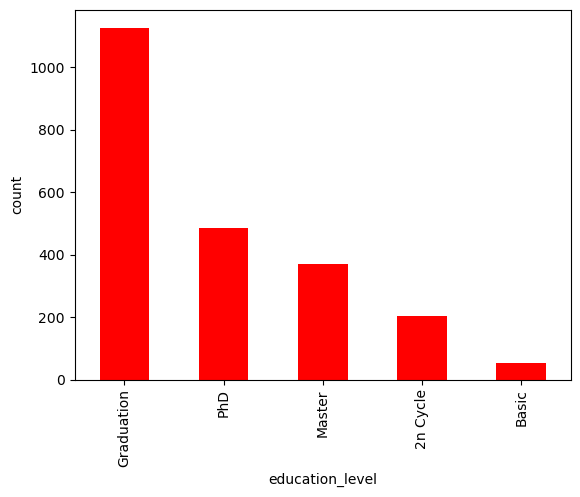

In [23]:
education_level_distribution.plot(kind='bar',color='red')
plt.xlabel('education_level')
plt.ylabel('count')
plt.show()

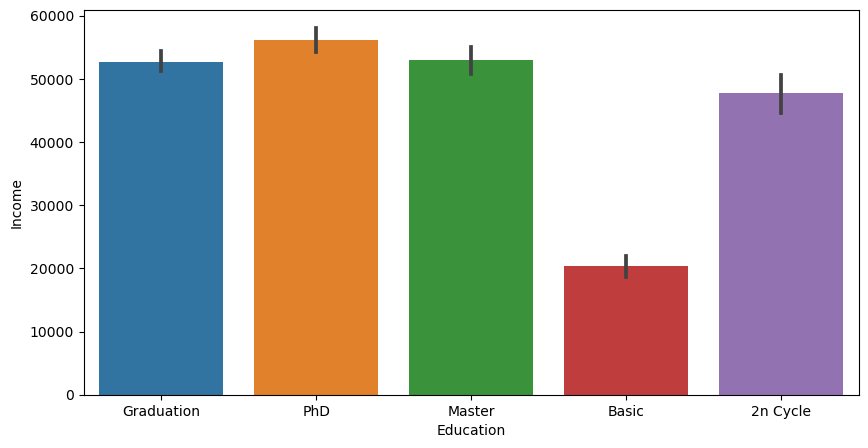

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(y='Income',x='Education',data=data)
plt.show()

In [25]:
marital_status = data['Marital_Status'].value_counts()
marital_status

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

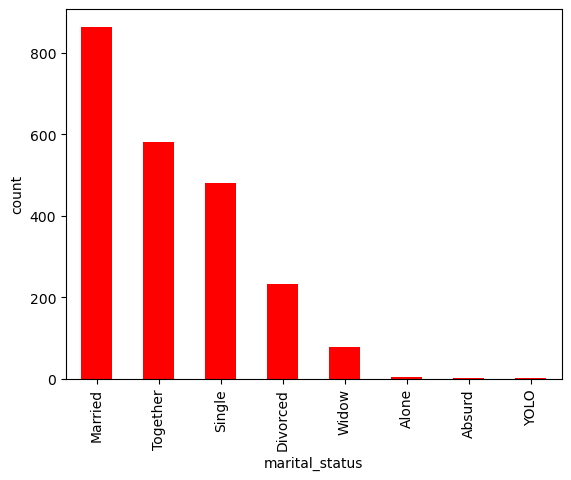

In [26]:
marital_status.plot(kind='bar',color='red')
plt.xlabel('marital_status')
plt.ylabel('count')
plt.show()

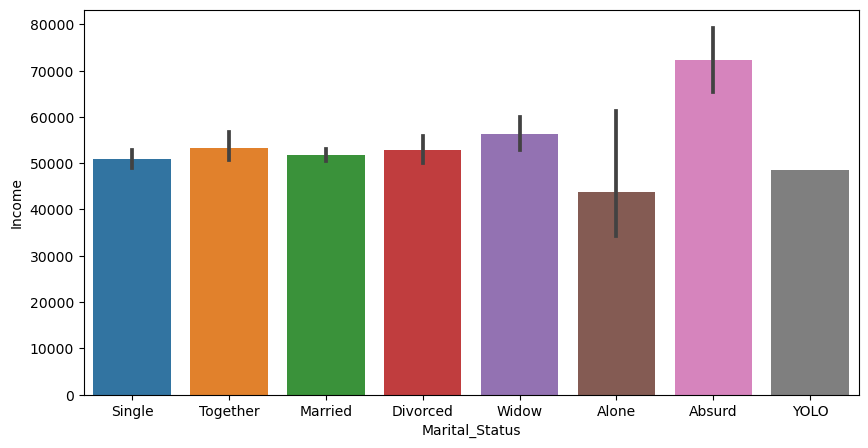

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(y='Income',x='Marital_Status',data=data)
plt.show()

In [28]:
average_income = data['Income'].mean()
average_income

52237.97544642857

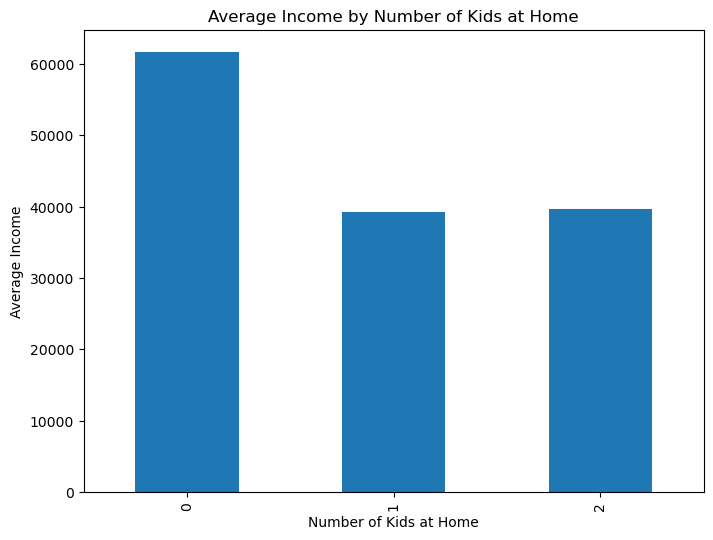

In [29]:
income_by_kids = data.groupby('Kidhome')['Income'].mean()
plt.figure(figsize=(8, 6))
income_by_kids.plot(kind='bar')
plt.title('Average Income by Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Average Income')
plt.show()

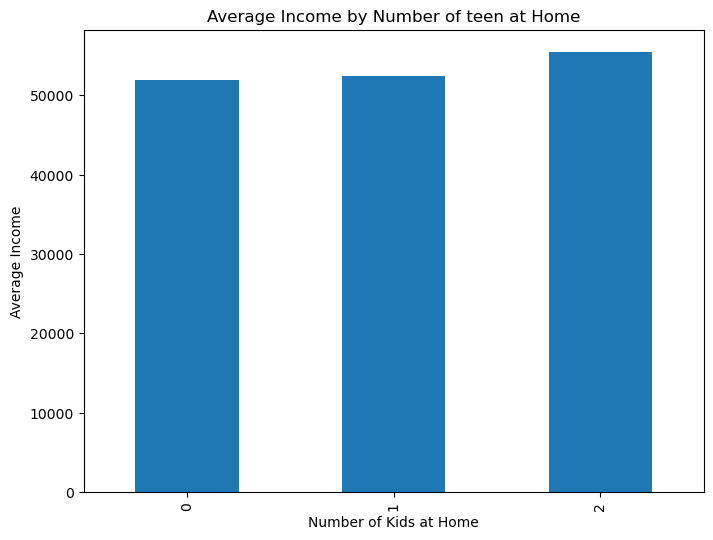

In [30]:
income_by_kids = data.groupby('Teenhome')['Income'].mean()
plt.figure(figsize=(8, 6))
income_by_kids.plot(kind='bar')
plt.title('Average Income by Number of teen at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Average Income')
plt.show()


In [31]:
data['Year_Birth'].describe()
    

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

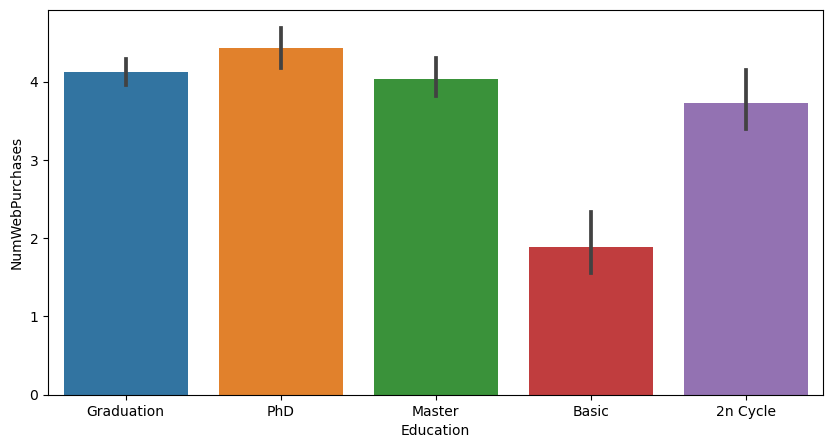

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(y='NumWebPurchases',x='Education',data=data)
plt.show()

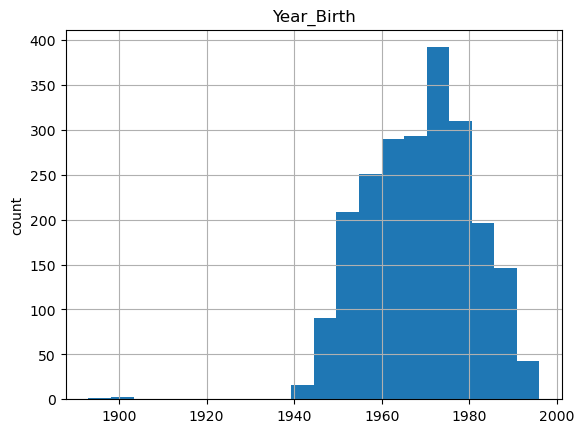

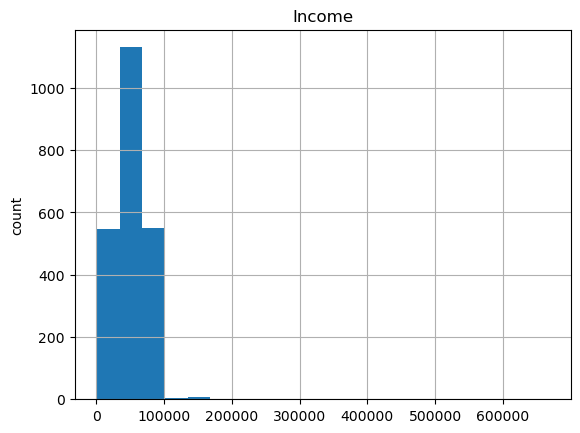

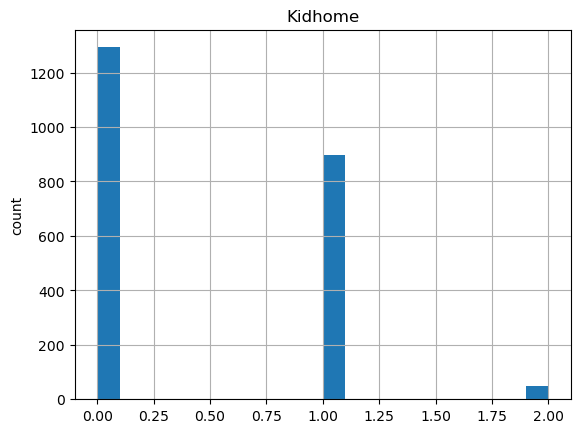

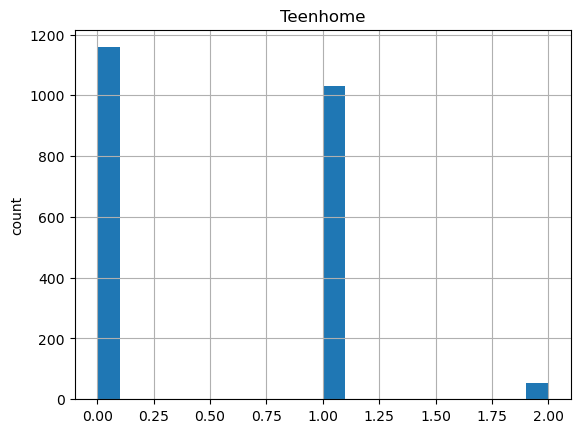

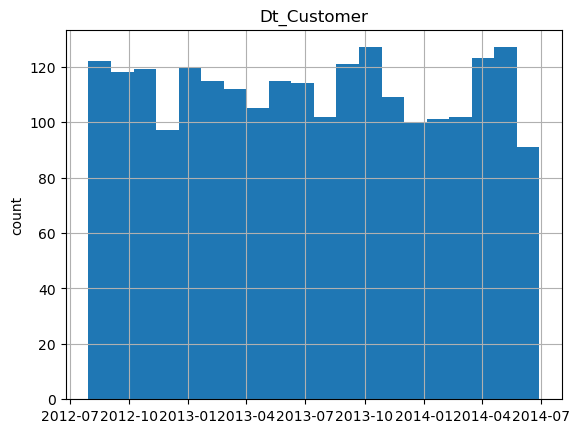

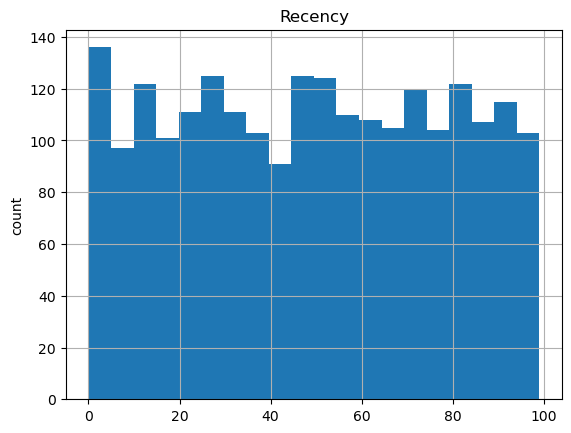

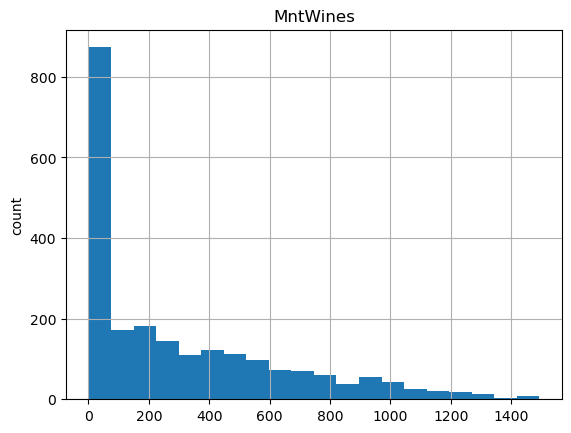

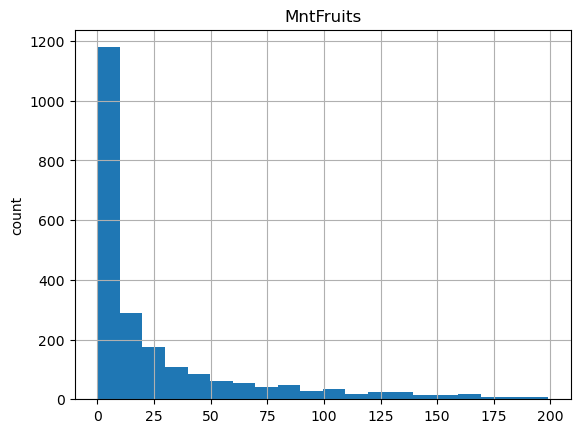

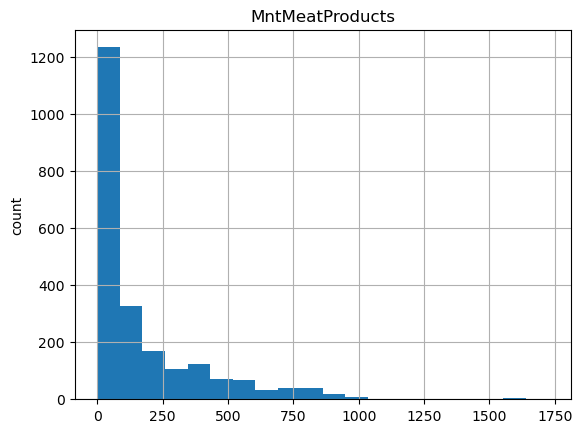

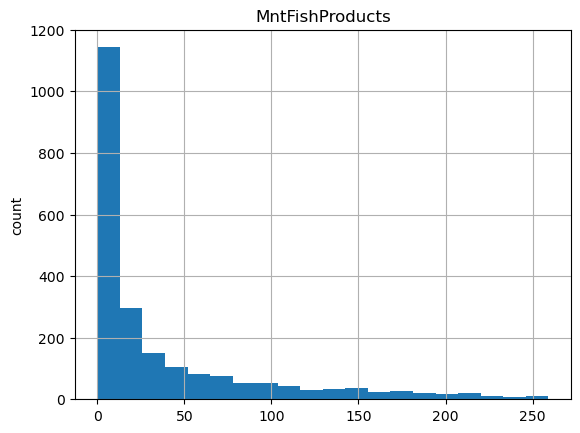

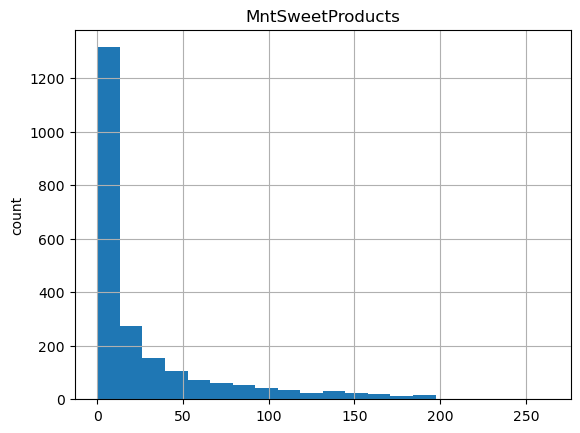

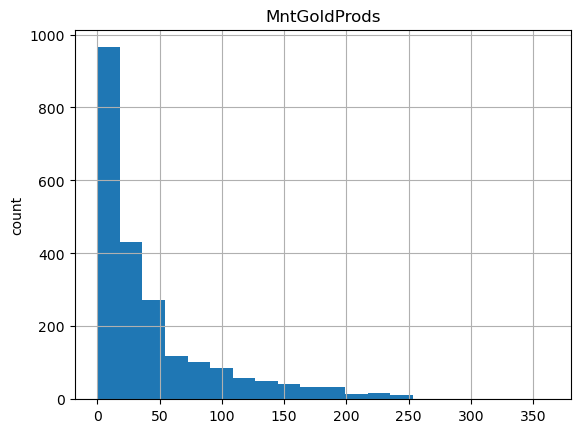

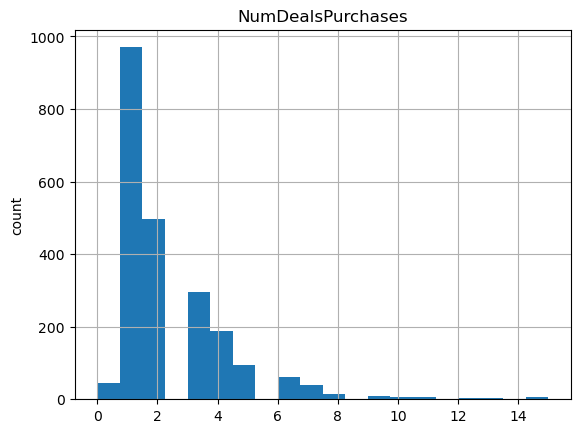

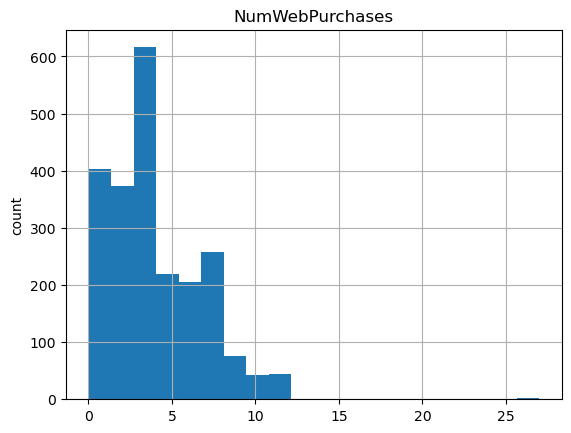

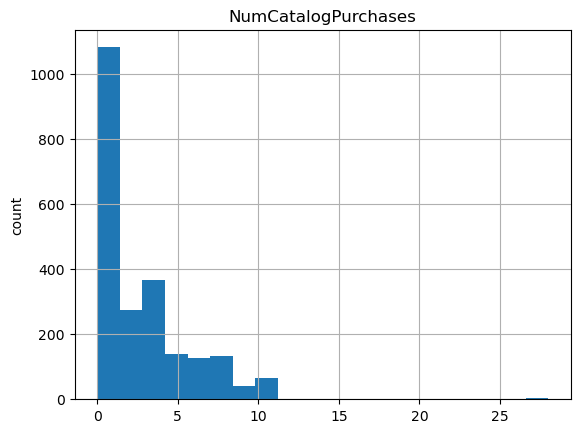

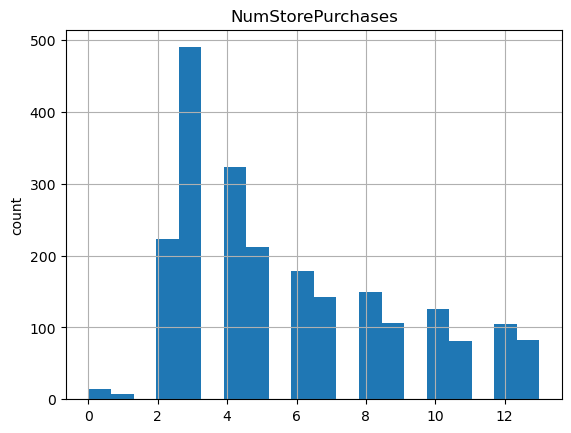

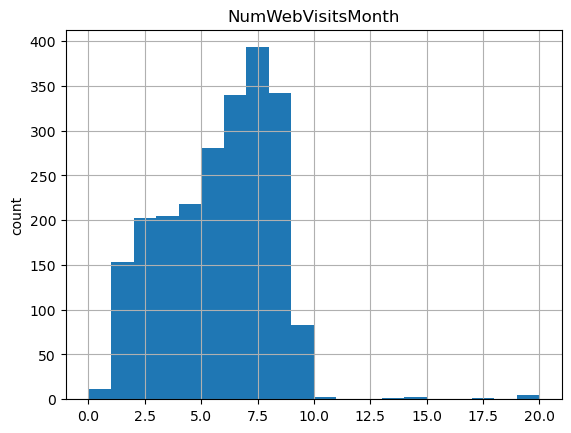

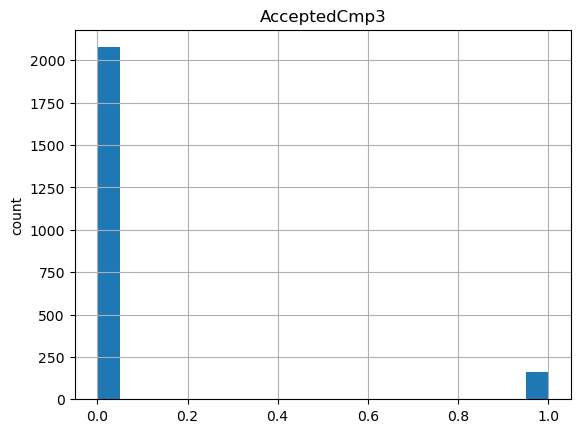

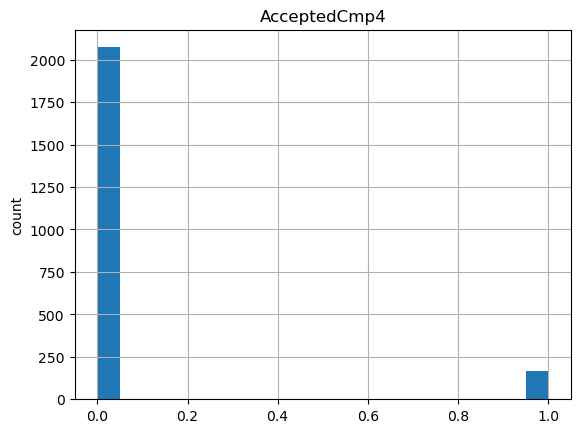

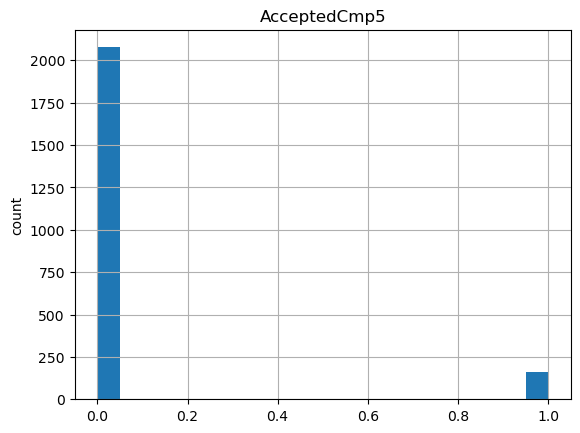

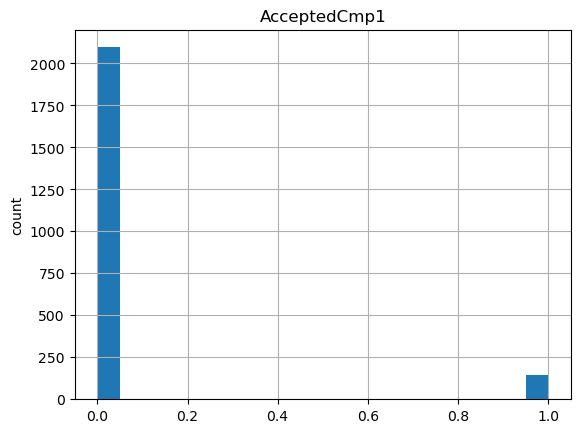

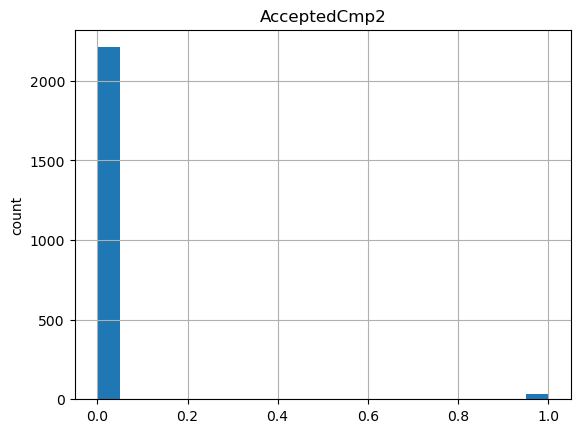

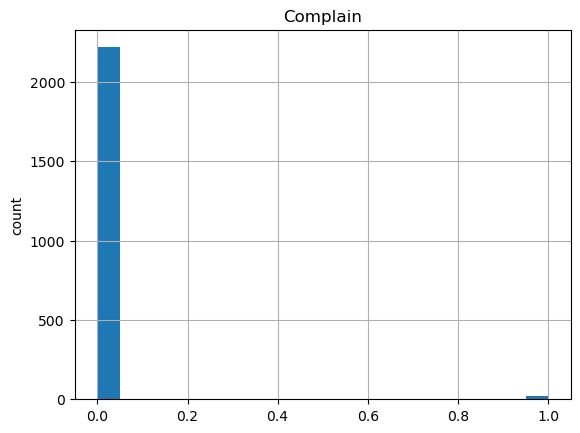

KeyError: 'Z_CostContact'

In [33]:
for feature in continous_features:
    data_1 = data.copy()
    data_1[feature].hist(bins=20)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

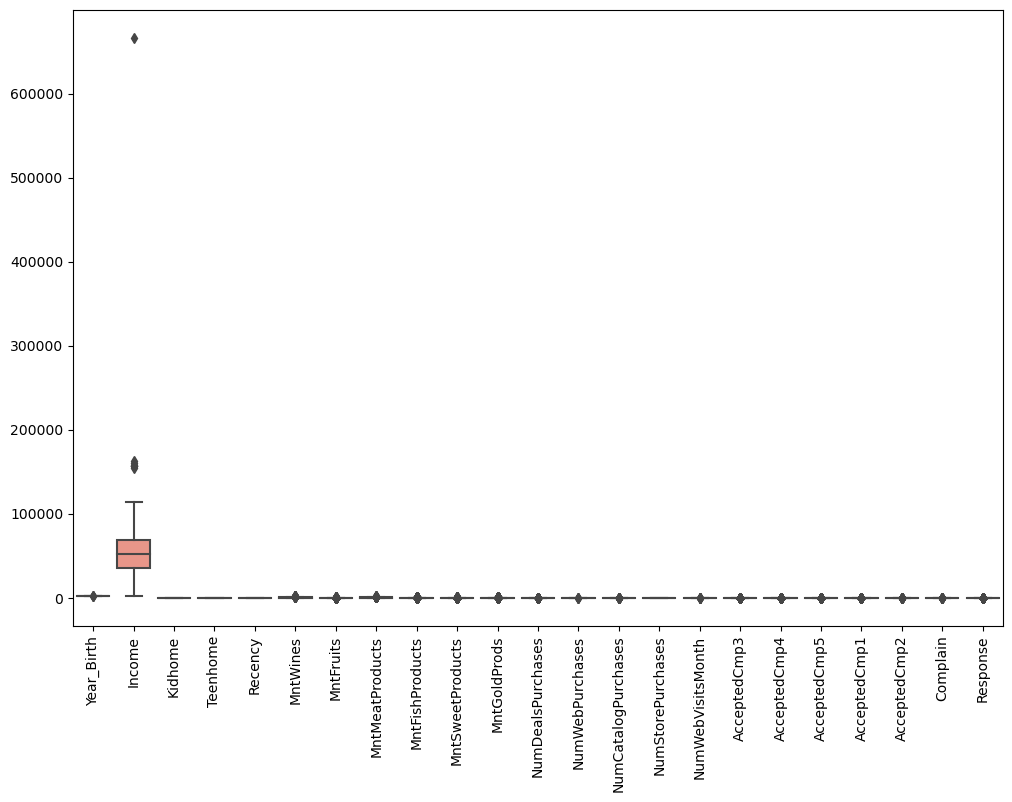

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data)
plt.xticks(fontsize=10,rotation=90)

plt.show()

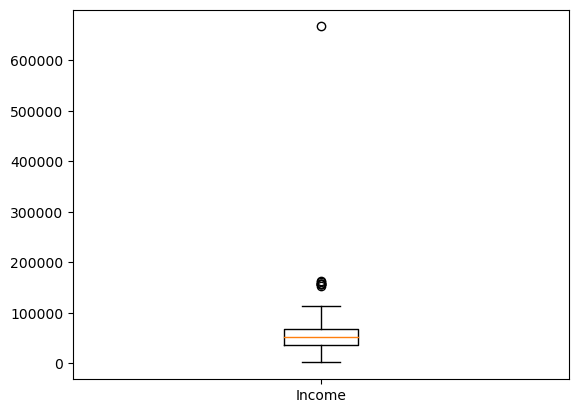

In [35]:
plt.boxplot(data['Income'],labels=['Income'])
plt.show()

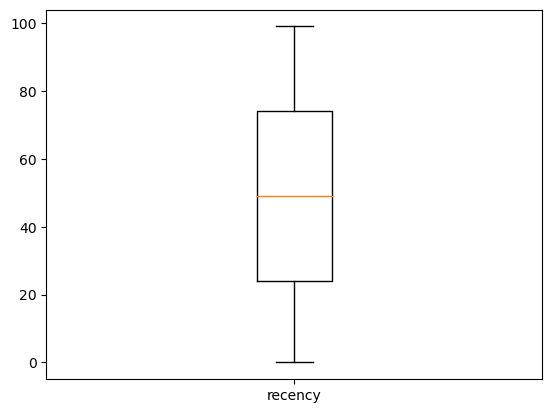

In [36]:
plt.boxplot(data['Recency'],labels=['recency'])
plt.show()

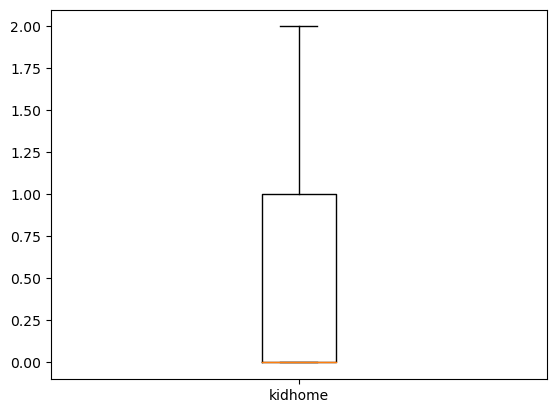

In [37]:
plt.boxplot(data['Kidhome'],labels=['kidhome'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a0497a3c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0497a02d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0497a1850>],
 'medians': [<matplotlib.lines.Line2D at 0x1a049784fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0497b6450>],
 'means': []}

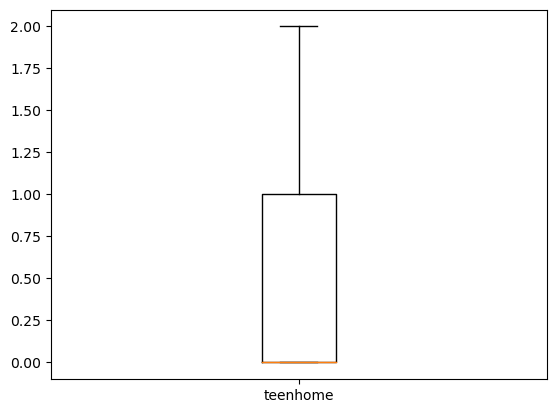

In [38]:
plt.boxplot(data['Teenhome'],labels=['teenhome'])

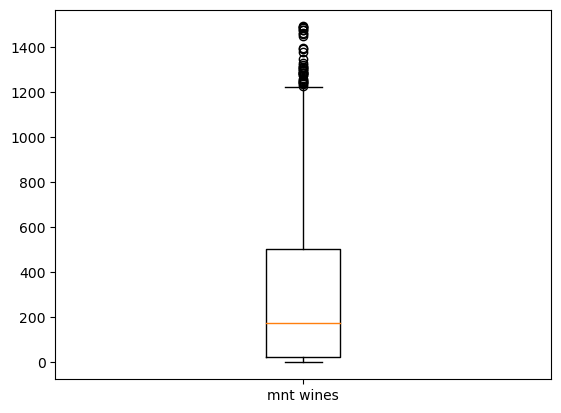

In [39]:
plt.boxplot(data['MntWines'],labels=['mnt wines'])
plt.show()

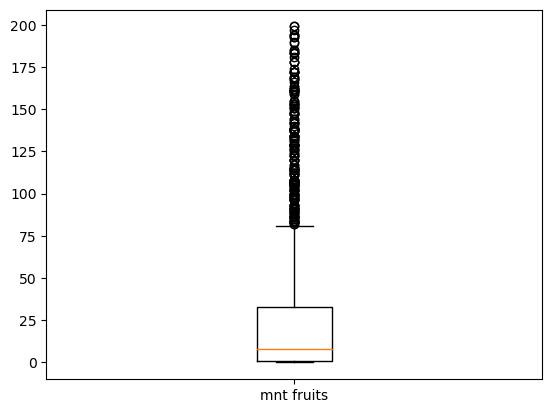

In [40]:
plt.boxplot(data['MntFruits'],labels=['mnt fruits'])
plt.show()

<Axes: xlabel='MntFruits', ylabel='Density'>

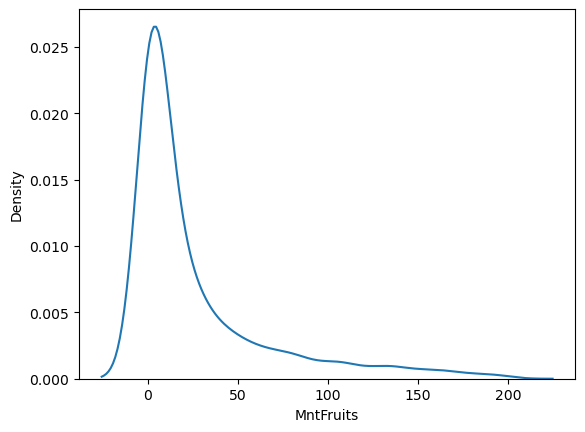

In [41]:
sns.kdeplot(data['MntFruits'])

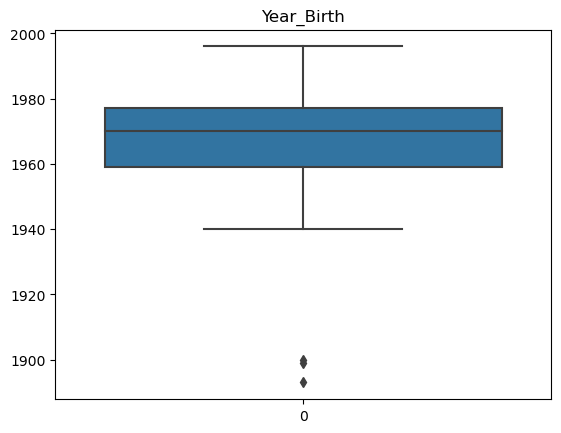

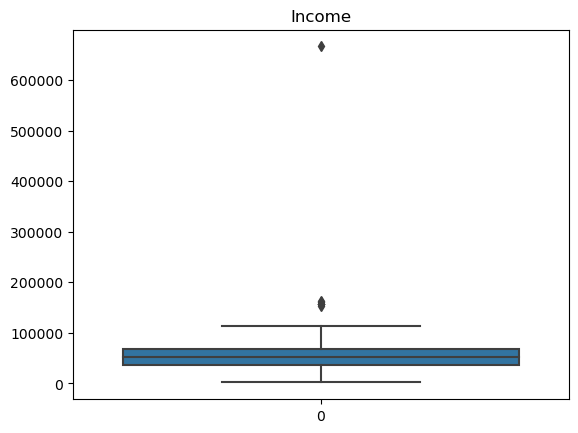

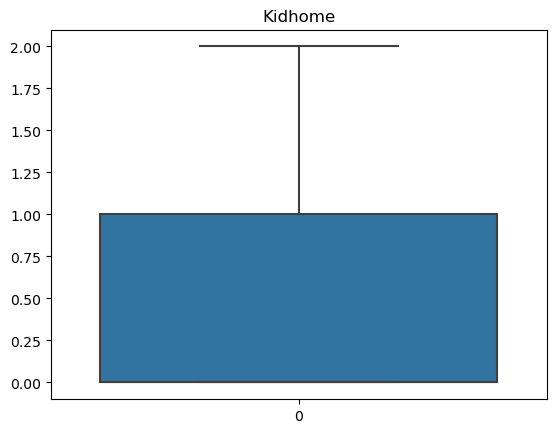

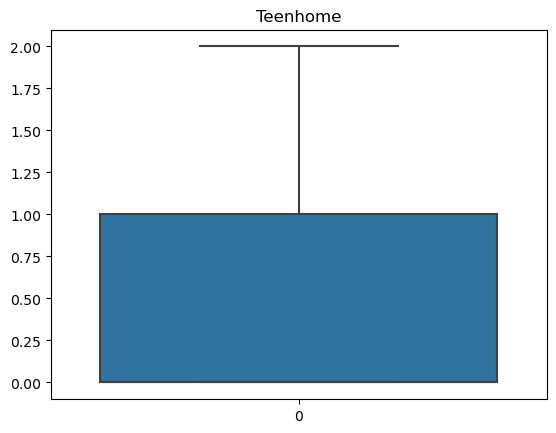

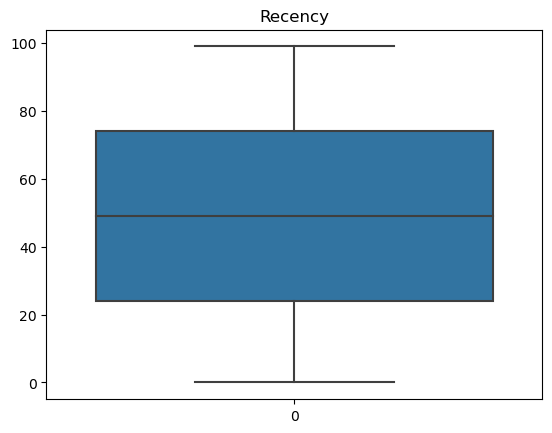

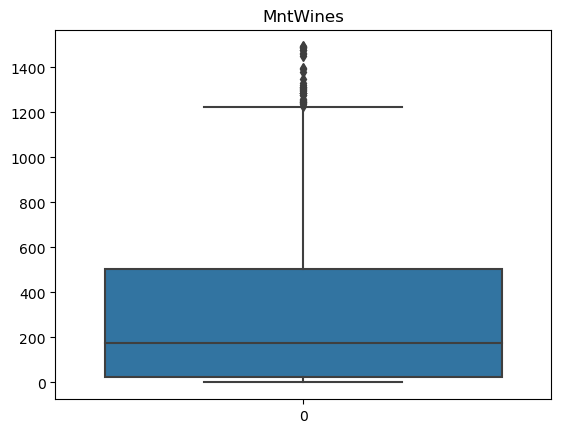

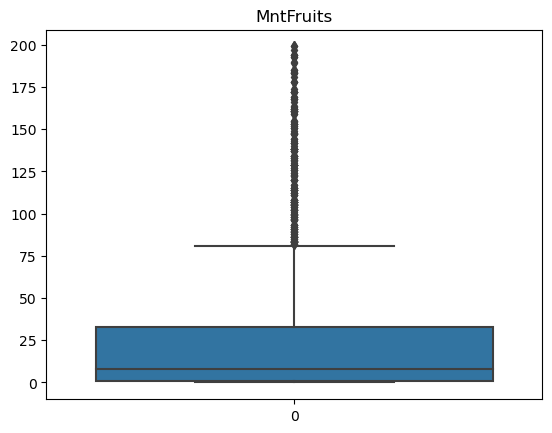

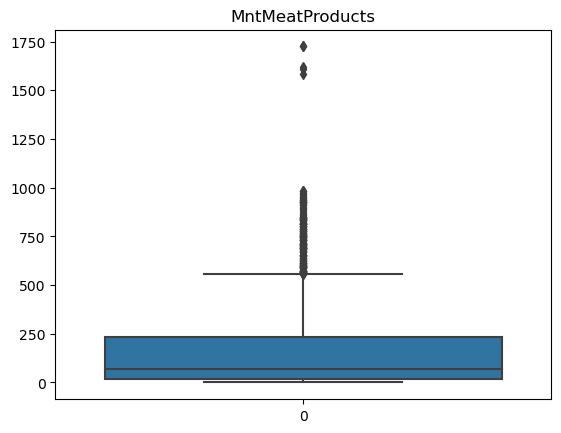

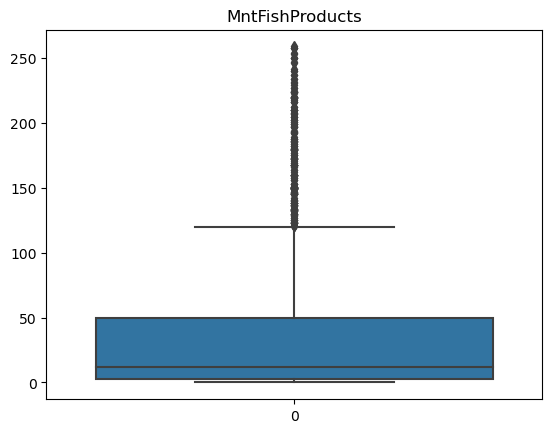

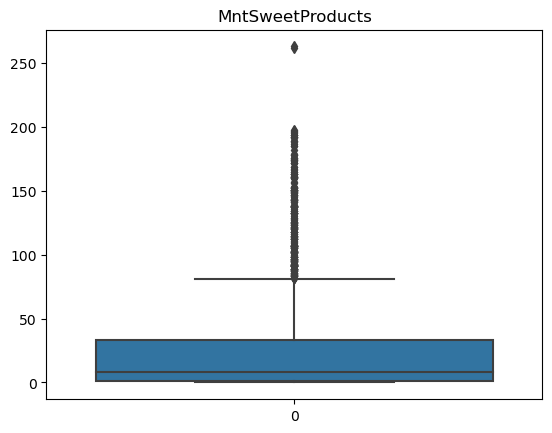

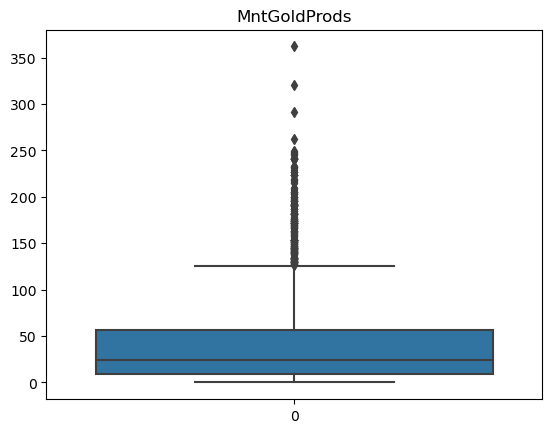

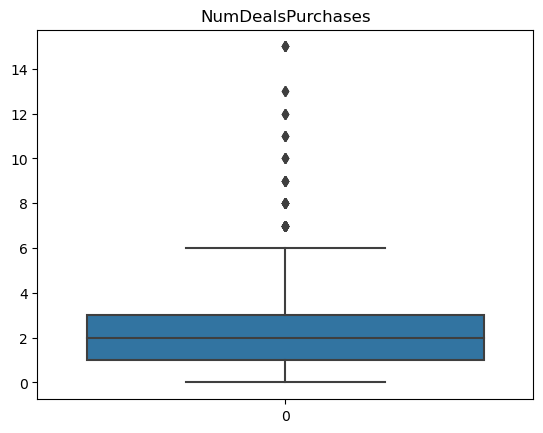

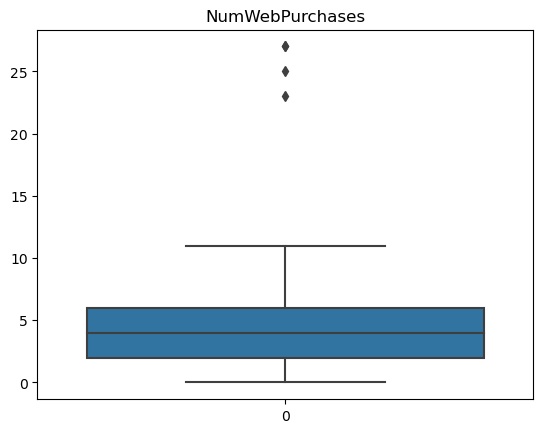

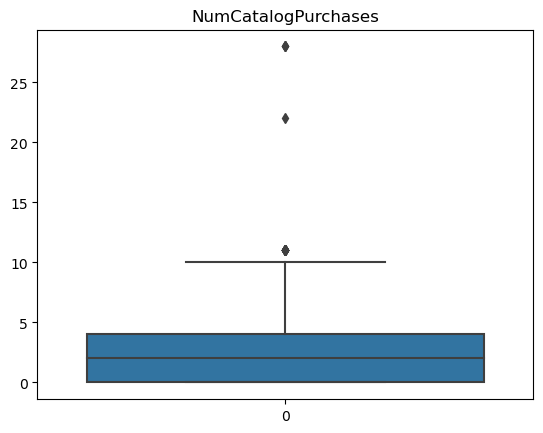

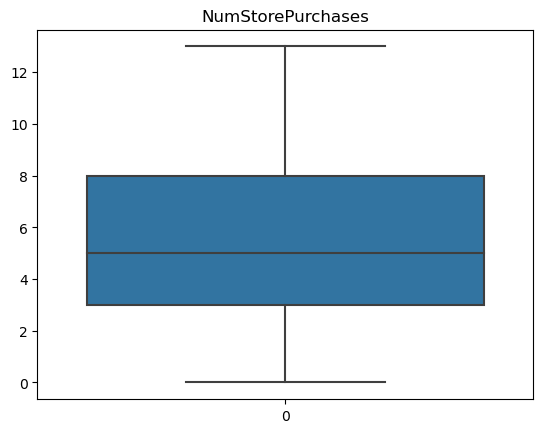

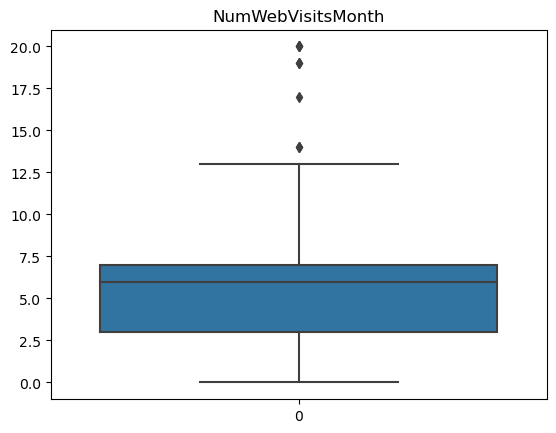

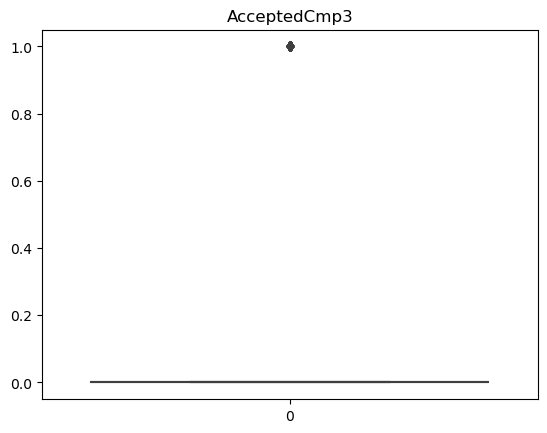

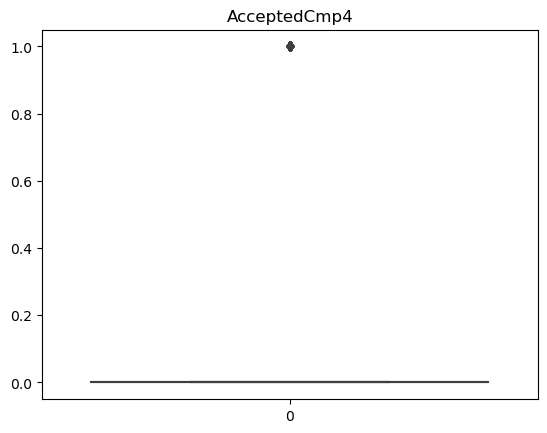

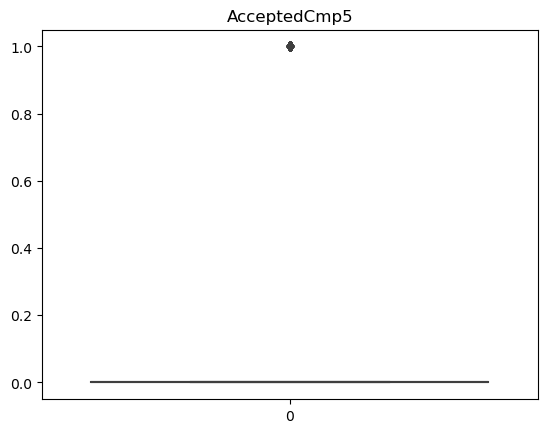

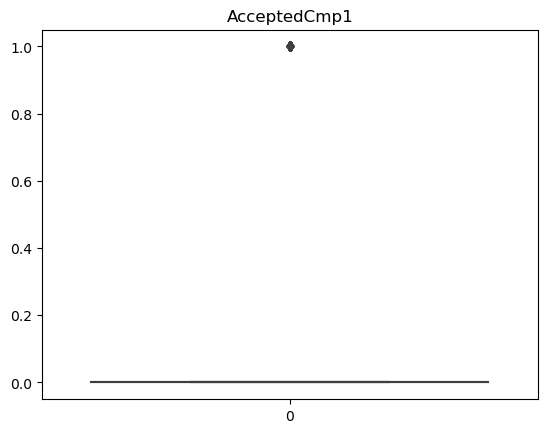

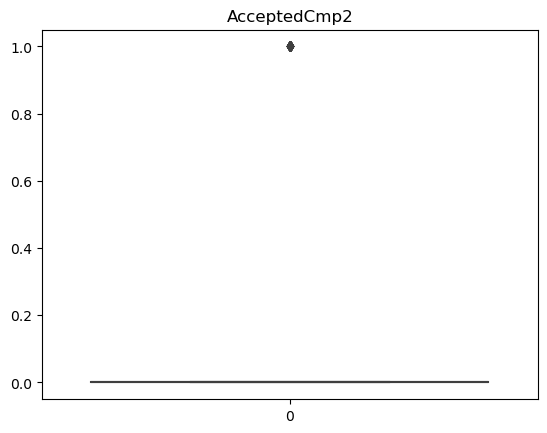

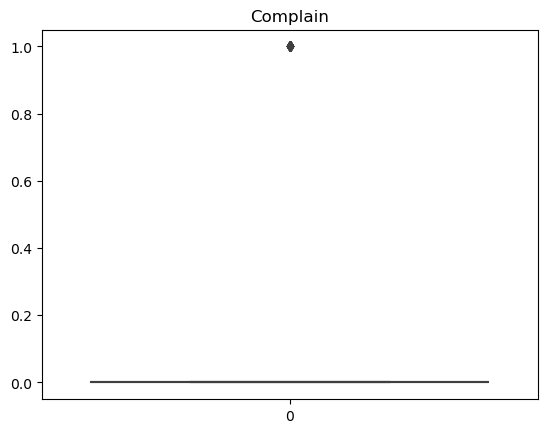

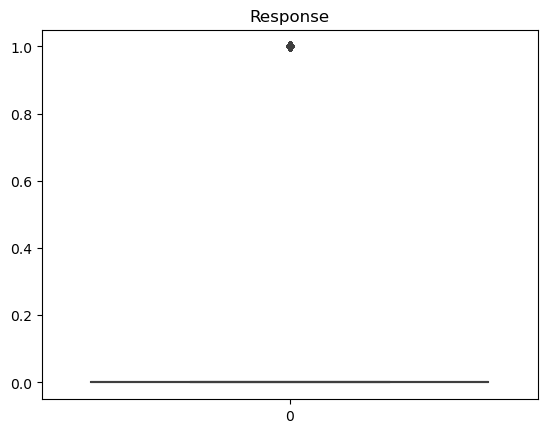

In [42]:
box=['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

for i in box:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()


In [43]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

outlier = data[(data['Income'] < (Q1 - 1.5 * IQR)) | (data['Income'] > (Q3 + 1.5 * IQR))]

print("Outlier Income :", len(outlier))


Outlier Income : 8


In [44]:
ic = np.abs(stats.zscore(data['Income']))
threshold = 3
outliers_ic = data[ic > threshold]
df_ic = pd.DataFrame(outliers_ic)
print(df_ic)
print(outliers_ic.shape)

      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164   2014-03-01       98        20          2             1582   
617   2013-06-03       31        85          1               16   
655   2014-02-07       81         1          1                1   
687   2012-08-04       21        55         16 

In [45]:
wines = np.abs(stats.zscore(data['MntWines']))
threshold = 3
outliers_wines = data[wines > threshold]
df_wines = pd.DataFrame(outliers_wines)
print(df_wines)
print(outliers_wines.shape)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
111         1991         PhD         Single  68126.0        0         0   
161         1945         PhD        Married  70356.0        0         0   
497         1971         PhD       Together  78642.0        0         1   
523         1953  Graduation        Married  70503.0        0         0   
543         1982         PhD        Married  84169.0        0         0   
559         1959  Graduation       Together  87771.0        0         1   
824         1959  Graduation       Together  87771.0        0         1   
917         1982         PhD        Married  84169.0        0         0   
987         1969  Graduation        Married  75759.0        0         0   
1052        1949         PhD        Married  69098.0        0         0   
1488        1955  Graduation        Married  76998.0        0         1   
1641        1964         PhD       Divorced  64140.0        0         2   
1749        1949         

In [46]:
fruits = np.abs(stats.zscore(data['MntFruits']))
threshold = 3
outliers_fruits = data[fruits > threshold]
df_fruits = pd.DataFrame(outliers_fruits)
print(df_fruits)
print(outliers_fruits.shape)


      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
45          1976  Graduation         Single  79941.0        0         0   
102         1979  Graduation       Together  85693.0        0         1   
109         1960      Master        Married  89058.0        0         0   
168         1988  Graduation         Single  66951.0        0         0   
198         1954  Graduation        Married  86718.0        0         0   
...          ...         ...            ...      ...      ...       ...   
2048        1970  Graduation         Single  76467.0        1         0   
2056        1973  Graduation       Divorced  71128.0        1         0   
2071        1956  Graduation        Married  71866.0        0         1   
2172        1975  Graduation       Together  60934.0        0         1   
2217        1948         PhD          Widow  82032.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
45    2014-06-28       72       

In [47]:
meat = np.abs(stats.zscore(data['MntMeatProducts']))
threshold = 3
outliers_meat = data[meat > threshold]
df_meat = pd.DataFrame(outliers_meat)
print(df_meat)
print(outliers_meat.shape)

      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
21          1979  Graduation        Married    2447.0        1         0   
76          1972      Master        Married   75251.0        0         0   
126         1984  Graduation         Single   79607.0        0         0   
140         1992      Master         Single   92859.0        0         0   
164         1973         PhD        Married  157243.0        0         1   
456         1966    2n Cycle         Single   89572.0        0         0   
546         1964  Graduation          Widow   85620.0        0         0   
561         1980  Graduation         Single   81741.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
766         1977  Graduation        Married   74985.0        0         0   
845         1970  Graduation       Together   81205.0        0         0   
852         1957    2n Cycle        Married   82347.0        0         0   
906         

In [48]:
fish = np.abs(stats.zscore(data['MntFishProducts']))
threshold = 3
outliers_fish = data[fish > threshold]
df_fish = pd.DataFrame(outliers_fish)
print(df_fish)
print(outliers_fish.shape)

      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
12          1959  Graduation       Divorced   63033.0        0         0   
45          1976  Graduation         Single   79941.0        0         0   
201         1968  Graduation         Single   75922.0        0         0   
214         1985  Graduation        Married   70951.0        0         0   
243         1990  Graduation        Married   73687.0        0         0   
249         1969      Master       Together   65176.0        0         1   
266         1963  Graduation        Married   80124.0        0         0   
292         1980  Graduation        Married   82497.0        0         0   
305         1961      Master        Married   80950.0        0         0   
360         1957  Graduation        Married   78618.0        0         0   
459         1982    2n Cycle       Together   66664.0        0         0   
463         1963  Graduation        Married   80124.0        0         0   
492         

In [49]:
sweet = np.abs(stats.zscore(data['MntSweetProducts']))
threshold = 3
outliers_sweet = data[sweet > threshold]
df_sweet = pd.DataFrame(outliers_sweet)
print(df_sweet)
print(outliers_sweet.shape)

      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
27          1986  Graduation         Single   51381.5        1         0   
40          1980  Graduation        Married   80011.0        0         1   
51          1964      Master        Married   79143.0        0         0   
197         1954  Graduation        Married   80067.0        0         0   
203         1977         PhD       Together  102160.0        0         0   
...          ...         ...            ...       ...      ...       ...   
1960        1965      Master        Married   70053.0        0         1   
2012        1977  Graduation       Together   96876.0        0         0   
2065        1951  Graduation          Widow   67046.0        0         1   
2096        1975  Graduation       Together   80144.0        0         0   
2168        1984  Graduation        Married   90000.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27    2013-02-20    

In [50]:
gold = np.abs(stats.zscore(data['MntGoldProds']))
threshold = 3
outliers_gold = data[gold > threshold]
df_gold = pd.DataFrame(outliers_gold)
print(df_gold)
print(outliers_gold.shape)

      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
27          1986  Graduation         Single   51381.5        1         0   
53          1977  Graduation       Divorced   82582.0        0         0   
98          1951    2n Cycle        Married   78497.0        0         0   
126         1984  Graduation         Single   79607.0        0         0   
179         1951    2n Cycle        Married   78497.0        0         0   
266         1963  Graduation        Married   80124.0        0         0   
292         1980  Graduation        Married   82497.0        0         0   
339         1899         PhD       Together   83532.0        0         0   
347         1970  Graduation       Divorced   84835.0        0         0   
368         1962  Graduation       Together   72025.0        0         0   
463         1963  Graduation        Married   80124.0        0         0   
586         1955  Graduation          Widow   79800.0        0         0   
646         

In [51]:
deals = np.abs(stats.zscore(data['NumDealsPurchases']))
threshold = 3
outliers_deals = data[deals > threshold]
df_deals = pd.DataFrame(outliers_deals)
print(df_deals)
print(outliers_deals.shape)

      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
21          1979  Graduation        Married    2447.0        1         0   
49          1954         PhD        Married   72550.0        1         1   
90          1957         PhD        Married   51381.5        2         1   
164         1973         PhD        Married  157243.0        0         1   
213         1974      Master       Together   46014.0        1         1   
230         1966  Graduation         Single   37070.0        1         1   
287         1956      Master       Together   50898.0        1         1   
404         1955         PhD         Single   55521.0        1         2   
419         1971      Master        Married   49505.0        1         1   
432         1967    2n Cycle       Together   67309.0        1         1   
687         1982         PhD        Married  160803.0        0         0   
1042        1991  Graduation         Single    8028.0        0         0   
1060        

In [52]:
print(outliers_ic.shape)
print(outliers_wines.shape)
print(outliers_fruits.shape)
print(outliers_meat.shape)
print(outliers_fish.shape)
print(outliers_sweet.shape)
print(outliers_gold.shape)
print(outliers_deals.shape)

(8, 26)
(16, 26)
(64, 26)
(37, 26)
(58, 26)
(62, 26)
(44, 26)
(32, 26)


In [53]:
data.loc[ic > threshold, 'Income'] = data['Income'].median()

In [54]:
ic = np.abs(stats.zscore(data['Income']))
threshold = 3
outliers_ic = data[ic > threshold]
df_ic = pd.DataFrame(outliers_ic)
print(df_ic)
print(outliers_ic.shape)

      Year_Birth Education Marital_Status    Income  Kidhome  Teenhome  \
1898        1945       PhD         Single  113734.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1898  2014-05-28        9         6          2                3   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1898                1               262             3                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1898               27                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1898                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
1898             0             0         0         0  
(1, 26)


In [55]:
data.loc[wines > threshold, 'MntWines'] = data['MntWines'].median()

In [56]:
wines = np.abs(stats.zscore(data['MntWines']))
threshold = 3
outliers_wines = data[wines > threshold]
df_wines = pd.DataFrame(outliers_wines)
print(df_wines)
print(outliers_wines.shape)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
424         1941         PhD        Married  93027.0        0         0   
515         1975      Master         Single  81169.0        0         0   
826         1954  Graduation        Married  93404.0        1         2   
870         1983         PhD       Together  70123.0        0         0   
990         1954  Graduation       Divorced  85683.0        0         0   
1001        1987         PhD         Single  95169.0        0         0   
1191        1969      Master          Widow  67369.0        0         1   
1458        1970  Graduation         Single  93790.0        0         0   
1953        1976         PhD       Together  72335.0        0         0   
1992        1947      Master         Single  91712.0        0         0   
2127        1986         PhD        Married  82333.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
424   2013-04-13       77    128

In [57]:
data.loc[fruits > threshold, 'MntFruits'] = data['MntFruits'].median()

In [58]:
fruits = np.abs(stats.zscore(data['MntFruits']))
threshold = 3
outliers_fruits = data[fruits > threshold]
df_fruits = pd.DataFrame(outliers_fruits)
print(df_fruits)
print(outliers_fruits.shape)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
53          1977  Graduation       Divorced  82582.0        0         0   
126         1984  Graduation         Single  79607.0        0         0   
201         1968  Graduation         Single  75922.0        0         0   
248         1988         PhD        Married  67546.0        0         0   
277         1981      Master       Together  77882.0        0         0   
292         1980  Graduation        Married  82497.0        0         0   
312         1989  Graduation        Married  51381.5        0         0   
339         1899         PhD       Together  83532.0        0         0   
390         1979  Graduation       Together  90300.0        0         0   
426         1986  Graduation        Married  92910.0        0         0   
509         1959  Graduation       Divorced  61250.0        0         1   
519         1944      Master        Married  80184.0        0         0   
557         1982  Graduat

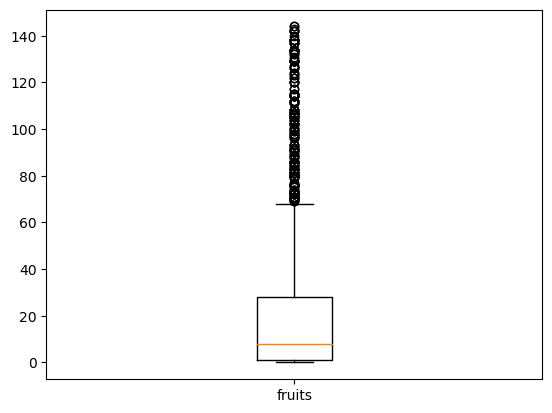

In [59]:
plt.boxplot(data['MntFruits'],labels=['fruits'])
plt.show()

In [60]:
data.loc[meat > threshold, 'MntMeatProducts'] = data['MntMeatProducts'].median()

In [61]:
meat = np.abs(stats.zscore(data['MntMeatProducts']))
threshold = 3
outliers_meat = data[meat > threshold]
df_meat = pd.DataFrame(outliers_meat)
print(df_meat)
print(outliers_meat.shape)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
29          1965         PhD        Married  84618.0        0         0   
51          1964      Master        Married  79143.0        0         0   
77          1976  Graduation         Single  75825.0        0         0   
116         1970  Graduation        Married  90765.0        0         0   
142         1962  Graduation        Married  86111.0        0         0   
197         1954  Graduation        Married  80067.0        0         0   
228         1972         PhD        Married  79930.0        0         0   
240         1968  Graduation          Widow  73455.0        0         0   
248         1988         PhD        Married  67546.0        0         0   
340         1988  Graduation         Single  68655.0        0         0   
357         1969         PhD        Married  68462.0        0         0   
360         1957  Graduation        Married  78618.0        0         0   
366         1960  Graduat

In [62]:
data.loc[fish > threshold, 'MntFishProducts'] = data['MntFishProducts'].median()


In [63]:
fish = np.abs(stats.zscore(data['MntFishProducts']))
threshold = 3
outliers_fish = data[fish > threshold]
df_fish = pd.DataFrame(outliers_fish)
print(df_fish)
print(outliers_fish.shape)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
55          1955      Master       Together  82384.0        0         0   
67          1979    2n Cycle         Single  88194.0        0         1   
70          1954      Master        Married  66991.0        0         0   
102         1979  Graduation       Together  85693.0        0         1   
...          ...         ...            ...      ...      ...       ...   
2134        1957      Master         Absurd  65487.0        0         0   
2172        1975  Graduation       Together  60934.0        0         1   
2175        1975         PhD        Married  79174.0        0         0   
2188        1957      Master       Together  65487.0        0         0   
2206        1980  Graduation        Married  61014.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58     63

In [64]:
data.loc[sweet > threshold, 'MntSweetProducts'] = data['MntSweetProducts'].median()

In [65]:
data.loc[gold > threshold, 'MntGoldProds'] = data['MntGoldProds'].median()

In [66]:
data.loc[deals > threshold, 'NumDealsPurchases'] = data['NumDealsPurchases'].median()

In [67]:
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58     635.0         88              546   
1     2014-03-08       38      11.0          1                6   
2     2013-08-21       26     426.0         49              127   
3     2014-02-10       26      11.0          4               20   
4     2014-01-19       94     173.0         43              118   
...          ...      ...       ...        ...              ...   
2235  2013-06-13       46     709.0         43              182   
2236  2014-06-10       56     406.0          0               30   
2237  2014-01-25       91     908.0         48              217   
2238  2014-01-24        8     428.0         30              214   
2239  2012-10-15       40      84.0          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118            24                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0   

In [68]:
amounts_spend = data.columns.tolist()[8:14]

data[amounts_spend].sum()

MntWines            660814.0
MntFruits            48650.0
MntMeatProducts     338950.0
MntFishProducts      71669.0
MntSweetProducts     50284.0
MntGoldProds         89370.0
dtype: float64

In [69]:
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [70]:
coupons = data.columns.tolist()[19:24]

data[coupons].sum()

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

In [71]:
visits = data.columns.tolist()[14:19]
data[visits].sum()

NumDealsPurchases       4903
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumWebVisitsMonth      11909
dtype: int64

In [72]:
data.groupby('Marital_Status')[amounts_spend].sum()

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                          
Absurd             711.0        169              625              211   
Alone              554.0         12               79               23   
Divorced         74078.5       5314            33200             7501   
Married         247491.5      18977           125733            26198   
Single          136090.0      10156            75371            15559   
Together        174099.5      12166            90125            18705   
Widow            27145.5       1850            13717             3464   
YOLO               644.0          6              100                8   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Absurd                        61           187  
Alone                         21            81  
Divorced                    5120          9733  
Married                    18840         32886  
Single                     10923         18711  
Together                   12933         23712  
Widow                       2380          3976  
YOLO                           6            84

In [73]:
data['Marital_Status'].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single','Widow':'Single','Divorced':'Single','Together':'Married'},inplace=True)

In [74]:
data['Marital_Status'].value_counts()

Married    1444
Single      796
Name: Marital_Status, dtype: int64

In [75]:
data['Education'].replace({'2n Cycle':'Graduation','Basic':'Graduation'},inplace=True)

In [76]:
data['Education'].value_counts()

Graduation    1384
PhD            486
Master         370
Name: Education, dtype: int64

In [77]:
data['age'] = 2018 - data['Year_Birth']

In [78]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age'],
      dtype='object')

In [79]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

In [80]:
data['Enrolled'] = (pd.to_datetime('2018-01-01') - pd.to_datetime(data['Dt_Customer'])).dt.days 

In [81]:
data['Enrolled']

0       1945
1       1395
2       1594
3       1421
4       1443
        ... 
2235    1663
2236    1301
2237    1437
2238    1438
2239    1904
Name: Enrolled, Length: 2240, dtype: int64

In [82]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age', 'Children', 'Enrolled'],
      dtype='object')

In [83]:
Age = np.abs(stats.zscore(data['age']))
threshold = 3
outliers_age = data[Age > threshold]
df_age = pd.DataFrame(outliers_age)
print(df_age)
print(outliers_age.shape)

     Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
192        1900  Graduation         Single  36640.0  2013-09-26       99   
239        1893  Graduation         Single  60182.0  2014-05-17       23   
339        1899         PhD        Married  83532.0  2013-09-26       36   

     MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
192      15.0          6                8                7                 4   
239       8.0          0                5                7                 0   
339     755.0        144              562              104                64   

     MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192            25                  1                2                    1   
239             2                  1                1                    0   
339            24                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  Acce

In [84]:
idx = data.loc[data['age']>80].index.tolist()
data.drop(axis=0, index=idx, inplace=True)

In [85]:
data.shape

(2237, 27)

In [86]:
cols = ['age', 'Income','Children', 'Enrolled',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response' ]

df = data[cols]

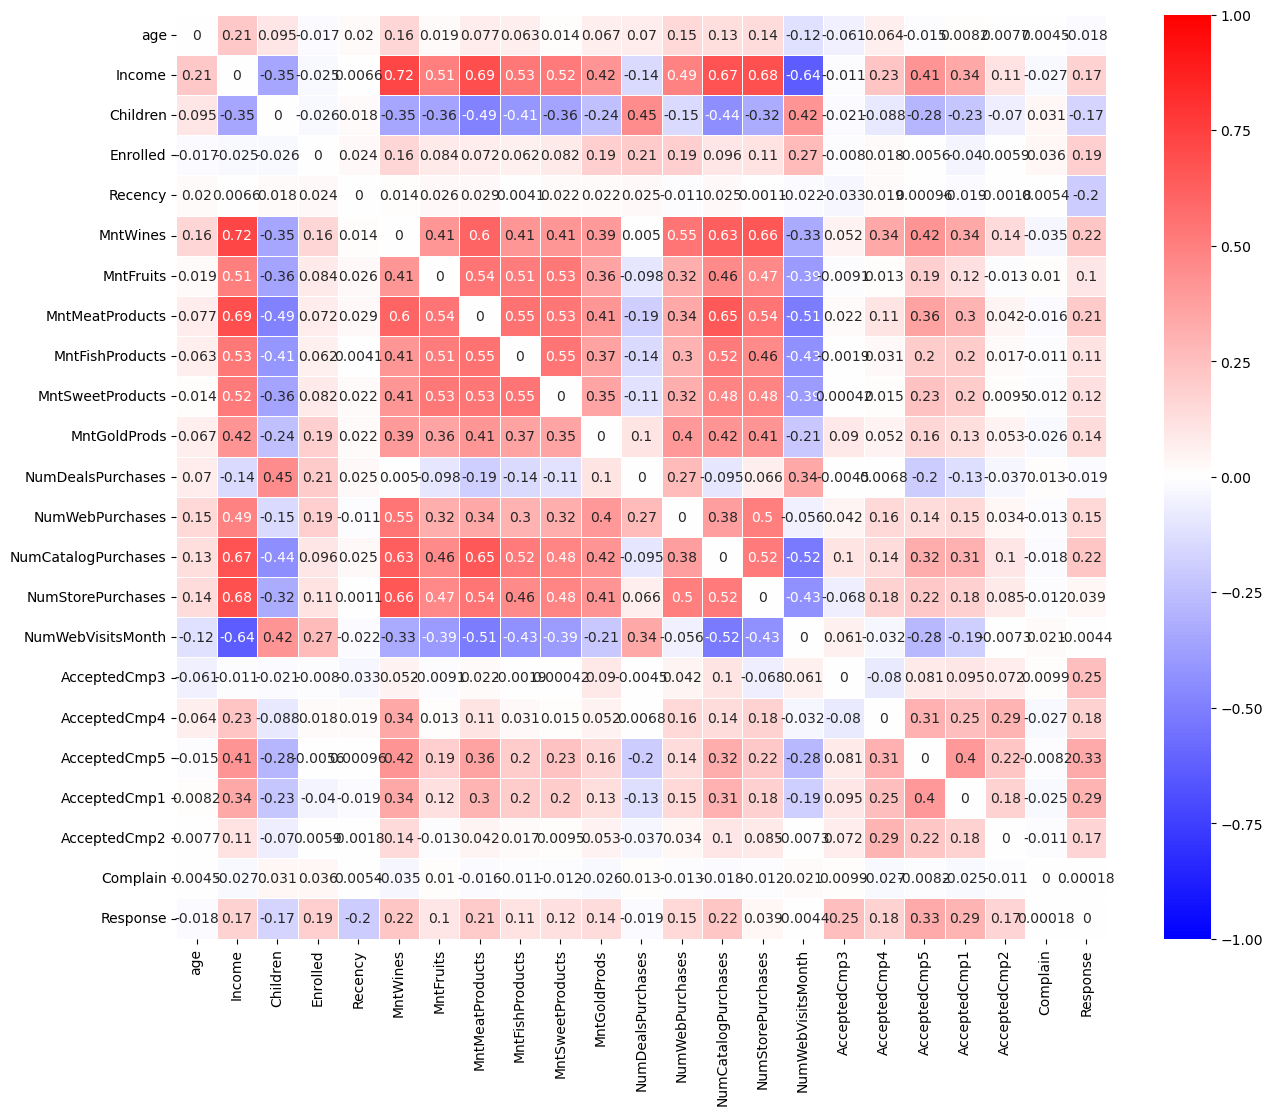

In [87]:
correlation= df.corr()
for i in range(len(correlation)):
    correlation.iloc[i,i] = 0.0
    
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, vmax=1, vmin=-1, annot=True, linewidths=.5, cmap='bwr')
plt.show()

In [88]:
skew_columns = df.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Complain               10.440555
AcceptedCmp2            8.466190
AcceptedCmp1            3.552527
AcceptedCmp5            3.301716
AcceptedCmp3            3.288924
AcceptedCmp4            3.238819
MntSweetProducts        1.970207
Response                1.969344
MntFruits               1.956986
NumCatalogPurchases     1.882130
MntFishProducts         1.838333
MntMeatProducts         1.673853
MntGoldProds            1.652336
NumDealsPurchases       1.389866
NumWebPurchases         1.381799
MntWines                1.112723
dtype: float64

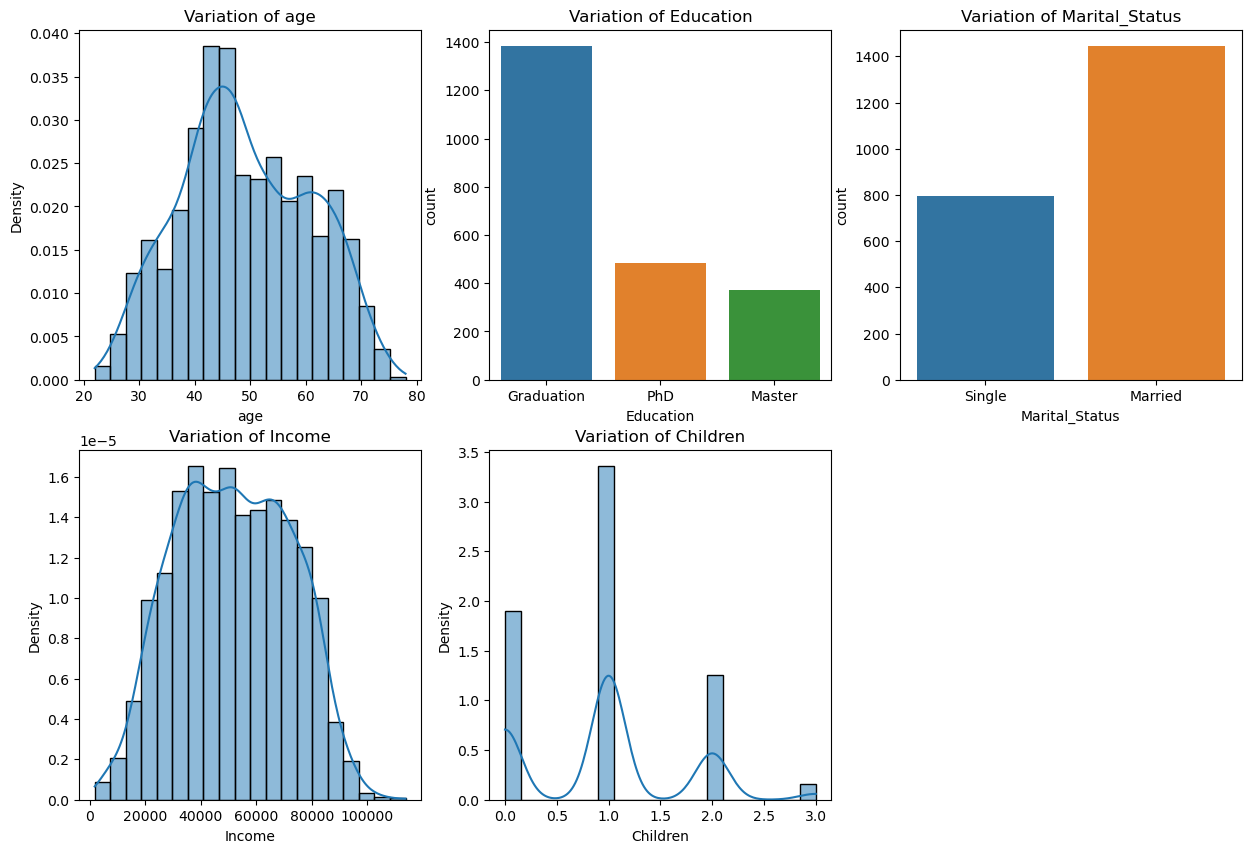

In [89]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['age','Education', 'Marital_Status', 'Income', 'Children']:
    n+=1
    plt.subplot(2,3,n)
    if(x in ['age','Income','Children']):
        sns.histplot(data[x], bins =20, kde=True, stat="density")
    else:
        sns.countplot(x = x, data=data )
    plt.title('Variation of {}'.format(x))
plt.show()

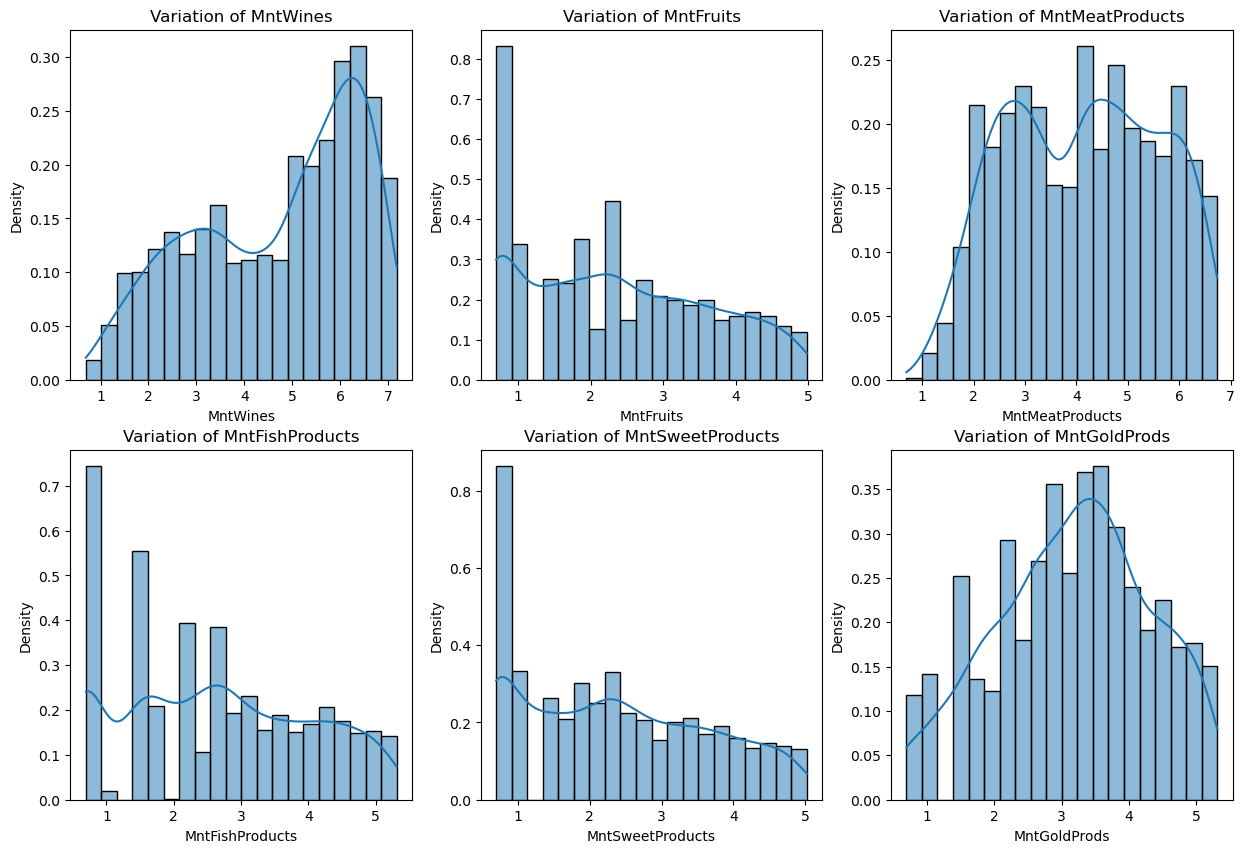

In [90]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    data[x] = data[x].apply(lambda x: x+1).apply(np.log1p)
    plt.subplot(2,3,n)
    sns.histplot(data[x], bins =20, kde=True, stat="density")
    plt.title('Variation of {}'.format(x))
                 
plt.show()

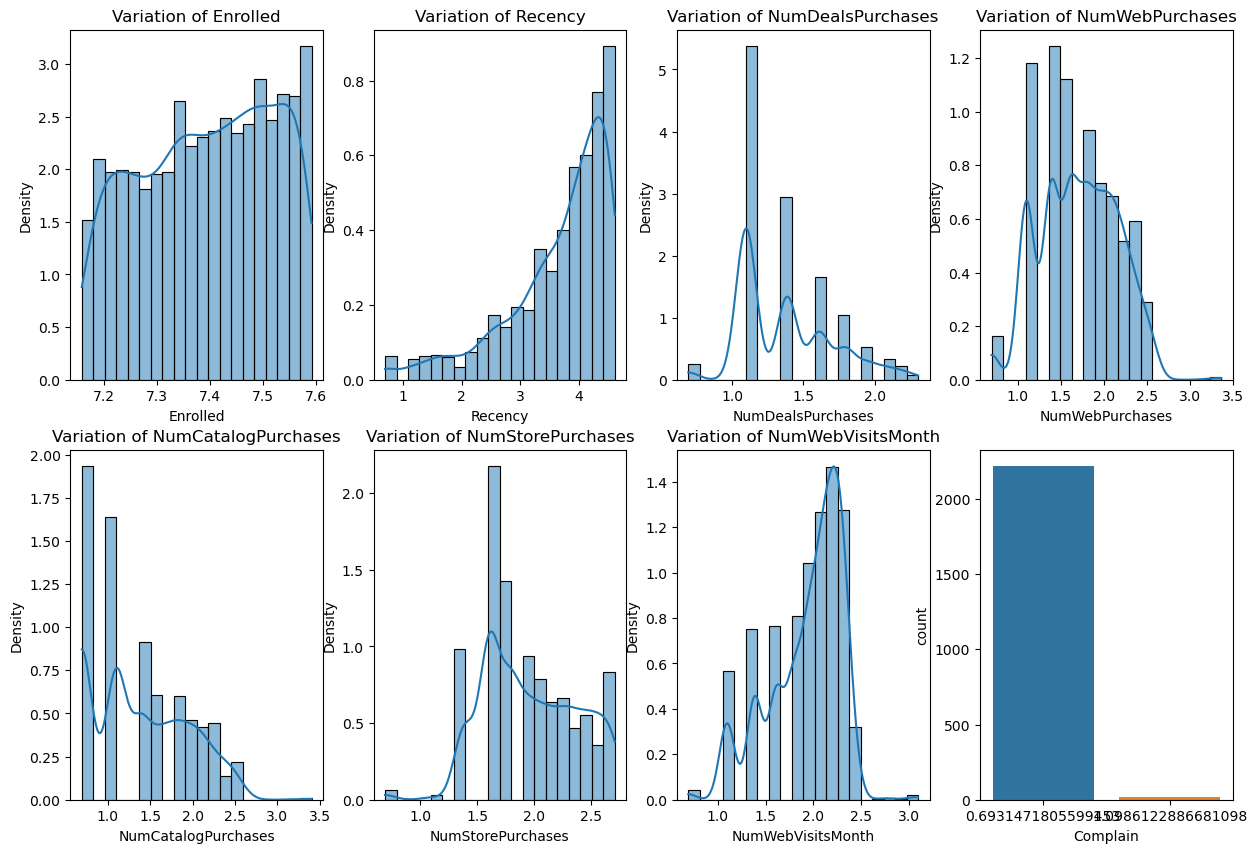

In [91]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Enrolled', 'Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    data[x] = data[x].apply(lambda x: x+1).apply(np.log1p)
    plt.subplot(2,4,n)
    if(x =='Complain'):
        sns.countplot(x = x, data=data )
        continue
    sns.histplot(data[x], bins =20, kde=True, stat="density")
    

    plt.title('Variation of {}'.format(x))
                 
plt.show()

In [92]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age', 'Children', 'Enrolled'],
      dtype='object')

In [93]:
data.drop(['Year_Birth','Dt_Customer'],axis=1,inplace=True)

In [94]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'Children', 'Enrolled'],
      dtype='object')

In [95]:
col = ['age','Education','Marital_Status','Children','Income','Enrolled','Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain', 'Response']

In [96]:
data['AcceptedCmp5'].value_counts()

0    2075
1     162
Name: AcceptedCmp5, dtype: int64

In [97]:
len(col)

25

In [98]:
len(data.columns)

25

In [99]:
le = LabelEncoder()
sc= StandardScaler()


In [100]:
data['Children'] = data[['Children']].apply(le.fit_transform)

In [101]:
data['Marital_Status'] = data[['Marital_Status']].apply(le.fit_transform)

In [102]:
data['Education'] = data[['Education']].apply(le.fit_transform)

In [103]:
scaled_data = sc.fit_transform(data[col])

In [104]:
scaled_data

array([[ 1.01729612, -0.72974207,  1.3481025 , ..., -0.11658951,
        -0.09498   ,  2.3869656 ],
       [ 1.27372169, -0.72974207,  1.3481025 , ..., -0.11658951,
        -0.09498   , -0.41894194],
       [ 0.33349461, -0.72974207, -0.74178336, ..., -0.11658951,
        -0.09498   , -0.41894194],
       ...,
       [-1.03410841, -0.72974207,  1.3481025 , ..., -0.11658951,
        -0.09498   , -0.41894194],
       [ 1.10277131,  0.48849152, -0.74178336, ..., -0.11658951,
        -0.09498   , -0.41894194],
       [ 1.27372169,  1.70672512, -0.74178336, ..., -0.11658951,
        -0.09498   ,  2.3869656 ]])

In [105]:
#data.drop(['preds','kmeans'],axis=1,inplace=True)

KeyError: "['preds', 'kmeans'] not found in axis"

In [106]:
data

Education  Marital_Status   Income   Recency  MntWines  MntFruits  \
0             0               1  58138.0  4.094345  6.456770   4.499810   
1             0               1  46344.0  3.688879  2.564949   1.098612   
2             0               0  71613.0  3.332205  6.059123   3.931826   
3             0               0  26646.0  3.332205  2.564949   1.791759   
4             2               0  58293.0  4.564348  5.164786   3.806662   
...         ...             ...      ...       ...       ...        ...   
2235          0               0  61223.0  3.871201  6.566672   3.806662   
2236          2               0  64014.0  4.060443  6.011267   0.693147   
2237          0               1  56981.0  4.532599  6.813445   3.912023   
2238          1               0  69245.0  2.302585  6.063785   3.465736   
2239          2               0  52869.0  3.737670  4.454347   1.609438   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            6.306275         5.159055          4.499810      4.499810   
1            2.079442         1.386294          1.098612      2.079442   
2            4.859812         4.727388          3.135494      3.784190   
3            3.091042         2.484907          1.609438      1.945910   
4            4.787492         3.871201          3.367296      2.833213   
...               ...              ...               ...           ...   
2235         5.214936         3.784190          4.787492      3.258097   
2236         3.465736         0.693147          0.693147      2.302585   
2237         5.389072         3.526361          2.639057      3.258097   
2238         5.375278         4.406719          3.465736      4.143135   
2239         4.143135         1.386294          1.098612      3.135494   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              1.609438         2.302585             2.484907   
1              1.386294         1.098612             1.098612   
2              1.098612         2.302585             1.386294   
3              1.386294         1.386294             0.693147   
4              1.945910         1.945910             1.609438   
...                 ...              ...                  ...   
2235           1.386294         2.397895             1.609438   
2236           2.197225         2.302585             1.386294   
2237           1.098612         1.386294             1.609438   
2238           1.386294         2.079442             1.945910   
2239           1.609438         1.609438             1.098612   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0              1.791759           2.197225             0             0   
1              1.386294           1.945910             0             0   
2              2.484907           1.791759             0             0   
3              1.791759           2.079442             0             0   
4              2.079442           1.945910             0             0   
...                 ...                ...           ...           ...   
2235           1.791759           1.945910             0             0   
2236           1.945910           2.197225             0             0   
2237           2.708050           2.079442             0             1   
2238           2.484907           1.609438             0             0   
2239           1.791759           2.197225             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  age  \
0                0             0             0  0.693147         1   61   
1                0             0             0  0.693147         0   64   
2                0             0             0  0.693147         0   53   
3                0             0             0  0.693147         0   34   
4                0             0             0  0.693147         0   37   
...            ...           ...           ...       ...       ...  ...   
2235             0   

In [107]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i,n_init='auto')
    k_means.fit(data)
    wcss.append(k_means.inertia_)
    

In [108]:
wcss

[945586518856.4624,
 273401740709.22284,
 136031847975.44516,
 83092531618.11465,
 53313087032.084366,
 40693271640.01164,
 32838972054.973633,
 25353443803.207066,
 18835633941.435196,
 15615766785.362122]

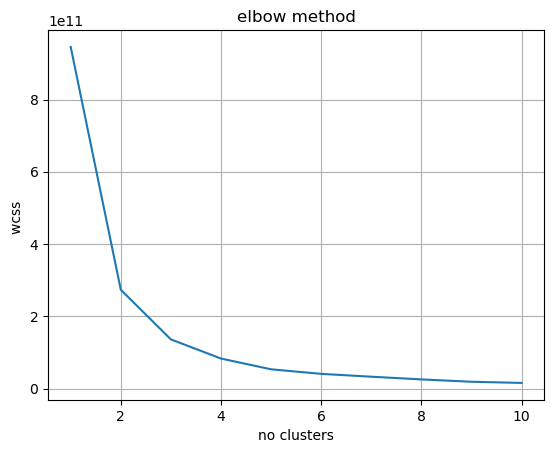

In [109]:
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('no clusters')
plt.ylabel('wcss ')

plt.grid()
plt.show()

In [110]:
num_clusters = 3
kmean = KMeans(n_clusters=num_clusters,n_init='auto')
data['Cluster'] = kmean.fit_predict(data)

In [111]:
data['Cluster'].value_counts()

2    803
1    718
0    716
Name: Cluster, dtype: int64

In [112]:
data.head(10)

Education  Marital_Status   Income   Recency  MntWines  MntFruits  \
0          0               1  58138.0  4.094345  6.456770   4.499810   
1          0               1  46344.0  3.688879  2.564949   1.098612   
2          0               0  71613.0  3.332205  6.059123   3.931826   
3          0               0  26646.0  3.332205  2.564949   1.791759   
4          2               0  58293.0  4.564348  5.164786   3.806662   
5          1               0  62513.0  2.890372  6.257668   3.784190   
6          0               1  55635.0  3.583519  5.468060   4.204693   
7          2               0  33454.0  3.526361  4.356709   2.484907   
8          2               0  30351.0  3.044522  2.772589   0.693147   
9          2               0   5648.0  4.248495  3.401197   0.693147   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         6.306275         5.159055          4.499810      4.499810   
1         2.079442         1.386294          1.098612      2.079442   
2         4.859812         4.727388          3.135494      3.784190   
3         3.091042         2.484907          1.609438      1.945910   
4         4.787492         3.871201          3.367296      2.833213   
5         4.605170         0.693147          3.784190      2.772589   
6         5.111988         3.951244          3.931826      3.367296   
7         4.060443         1.609438          1.098612      3.218876   
8         3.258097         1.609438          1.609438      1.386294   
9         2.079442         1.098612          1.098612      2.708050   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           1.609438         2.302585             2.484907           1.791759   
1           1.386294         1.098612             1.098612           1.386294   
2           1.098612         2.302585             1.386294           2.484907   
3           1.386294         1.386294             0.693147           1.791759   
4           1.945910         1.945910             1.609438           2.079442   
5           1.386294         2.079442             1.791759           2.484907   
6           1.791759         2.197225             1.609438           2.197225   
7           1.386294         1.791759             0.693147           1.791759   
8           1.098612         1.609438             0.693147           1.386294   
9           1.098612         1.098612             0.693147           0.693147   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0           2.197225             0             0             0             0   
1           1.945910             0             0             0             0   
2           1.791759             0             0             0             0   
3           2.079442             0             0             0             0   
4           1.945910             0             0             0             0   
5           2.079442             0             0             0             0   
6           2.079442             0             0             0             0   
7           2.302585             0             0             0             0   
8           2.397895             0             0             0             0   
9           3.091042             1             0             0             0   

   AcceptedCmp2  Complain  Response  age  Children  Enrolled  Cluster  
0             0  0.693147         1   61         0  7.574045        2  
1             0  0.693147         0   64         2  7.242082        2  
2             0  0.693147         0   53         0  7.375256        0  
3             0  0.693147         0   34         1  7.260523        1  
4             0  0.693147         0   37         1  7.275865        2  
5             0  0.693147         0   51         1  7.363280        2  
6             0  0.693147         0   47         1  7.537430        2  
7             0  0.693147         0   33         1  7.438972        1  
8      

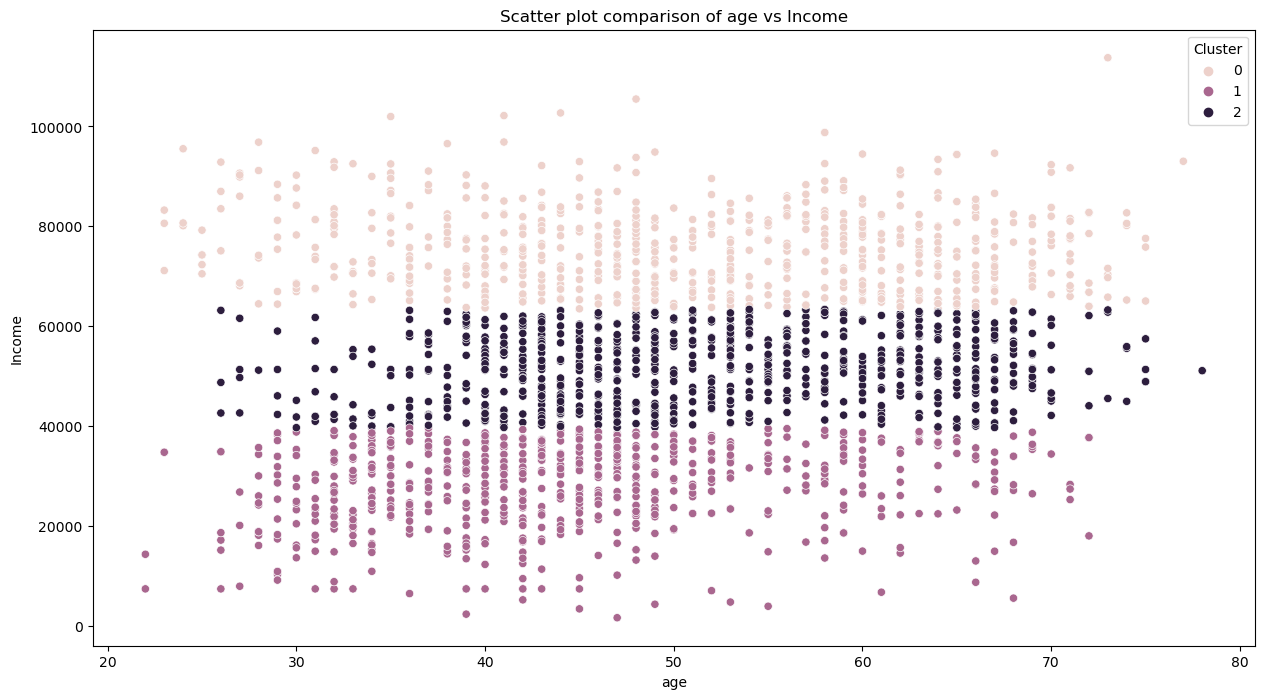

In [113]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='age',y='Income',hue='Cluster')
plt.title('Scatter plot comparison of age vs Income')
plt.show()

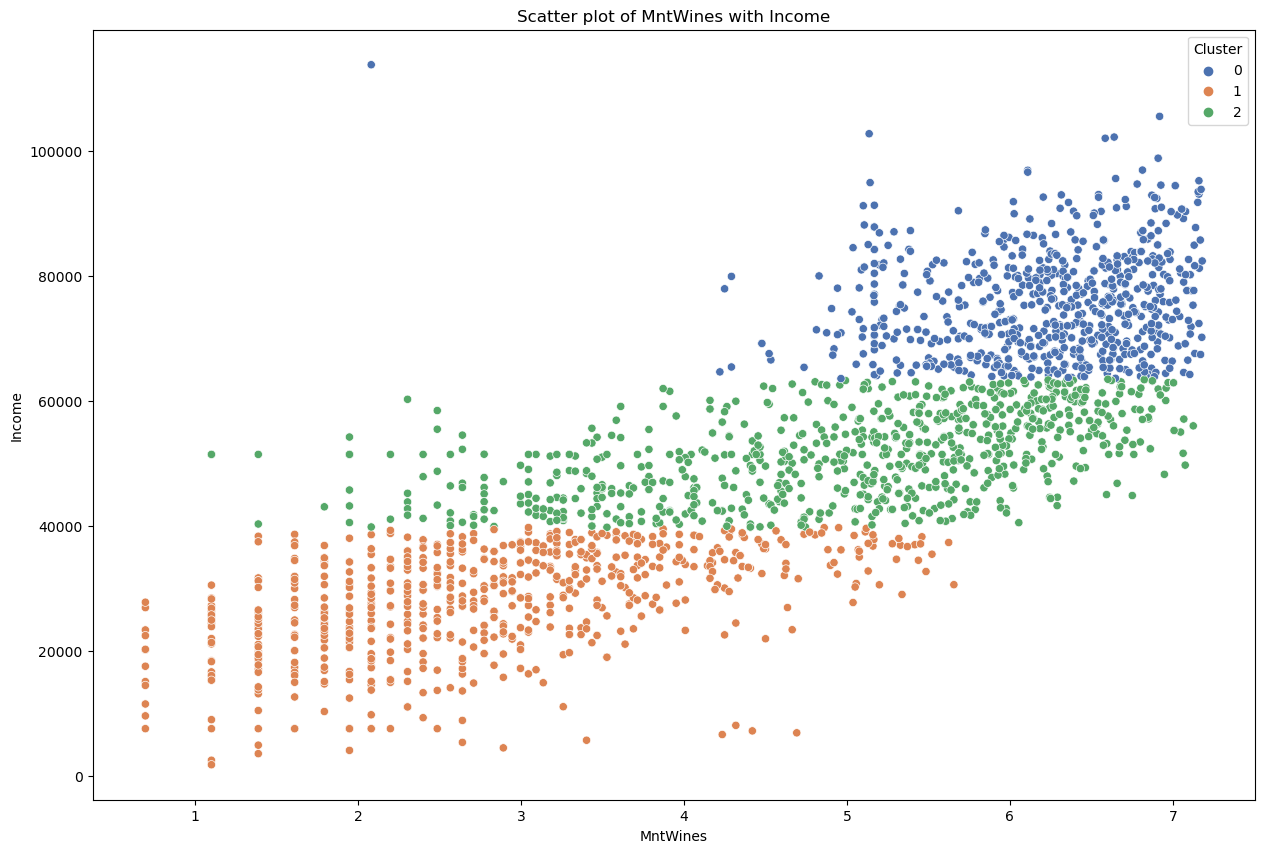

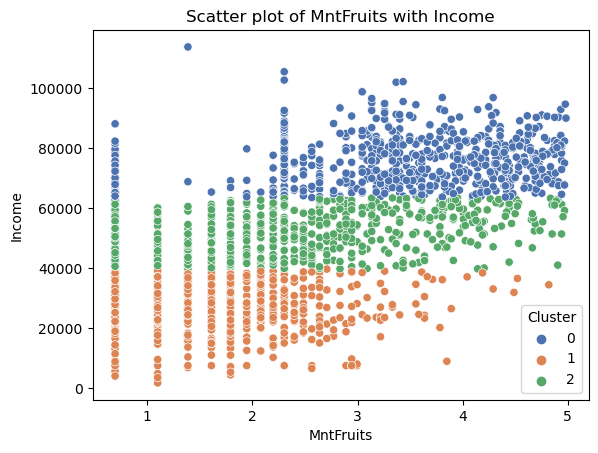

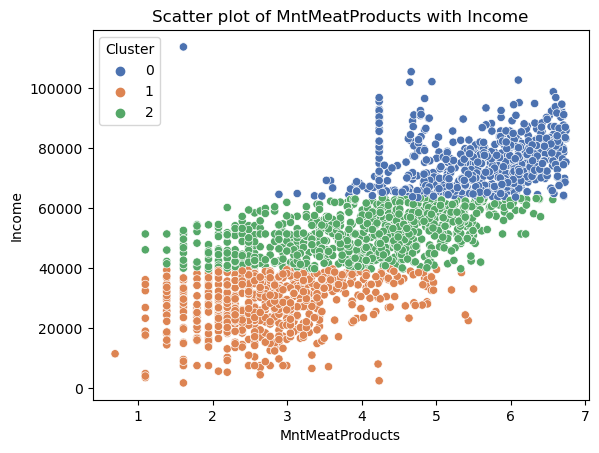

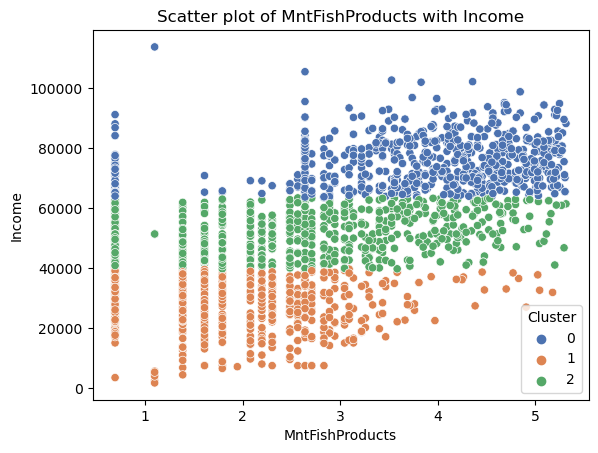

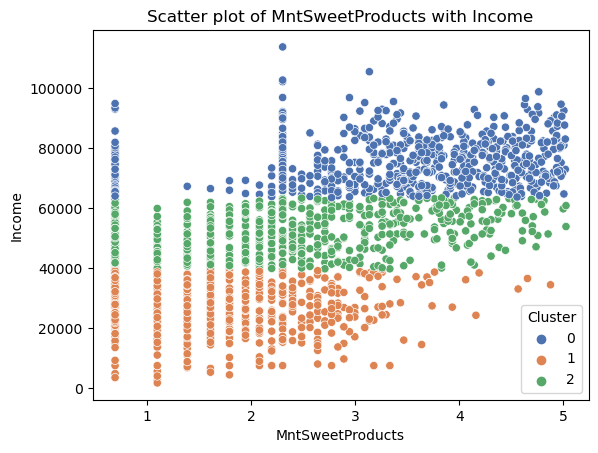

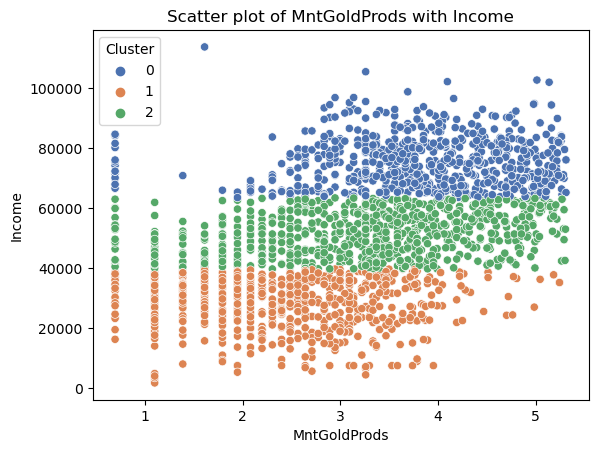

In [114]:
plt.figure( figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    sns.scatterplot( data = data, x =x, y='Income', hue = 'Cluster',palette='deep')
    plt.title('Scatter plot of {} with Income'.format(x))
    plt.show()

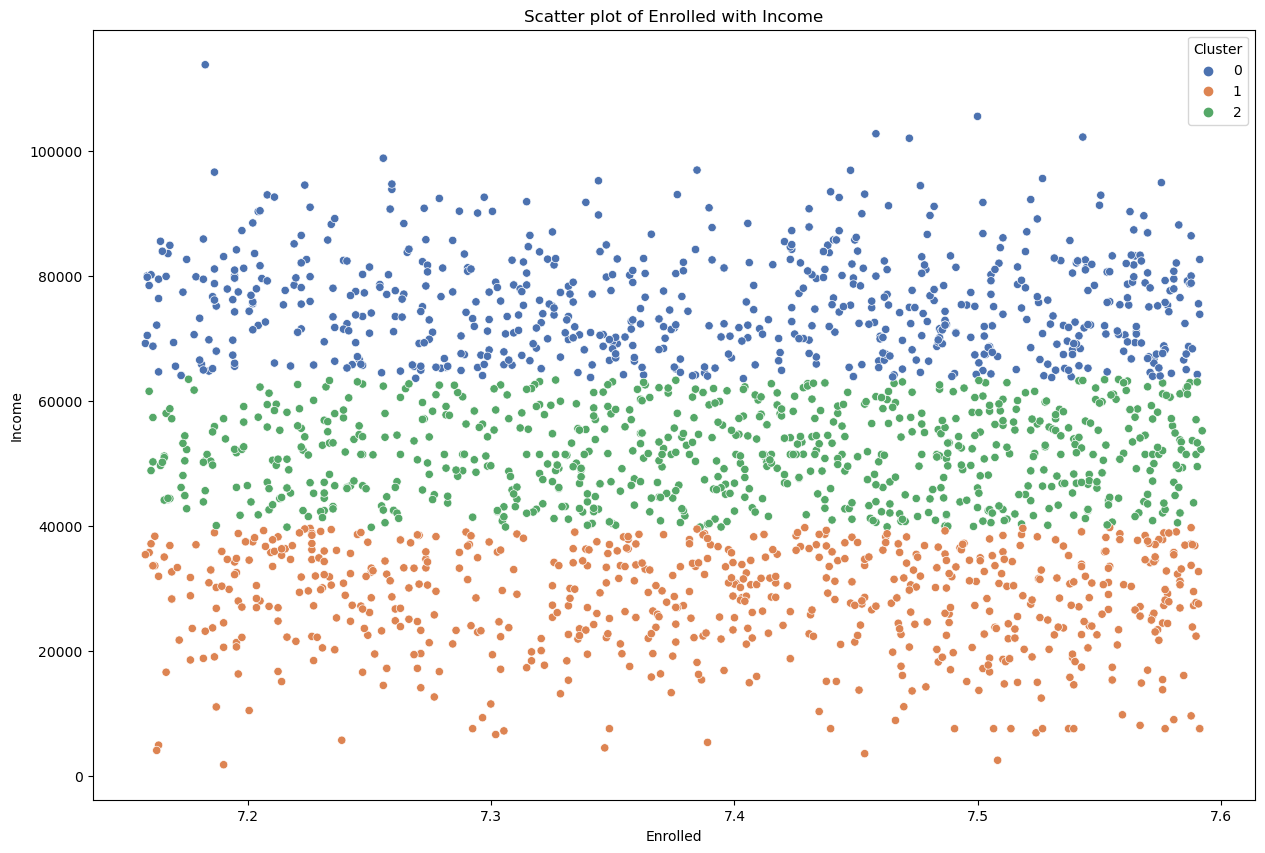

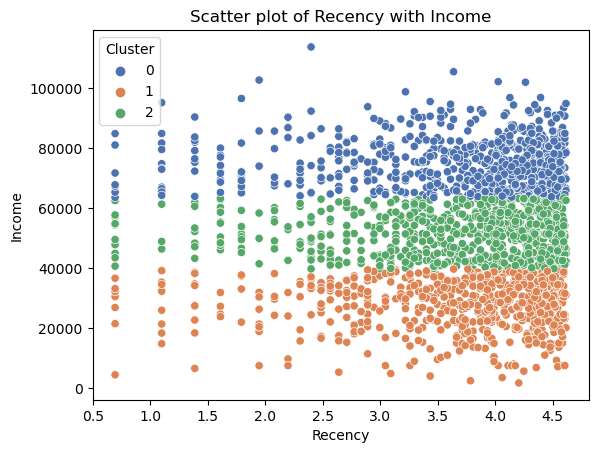

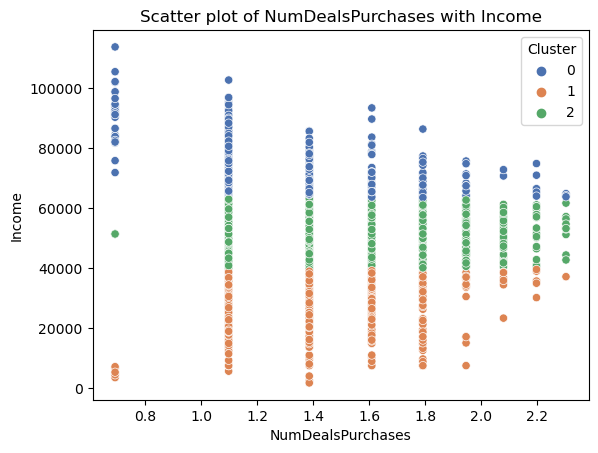

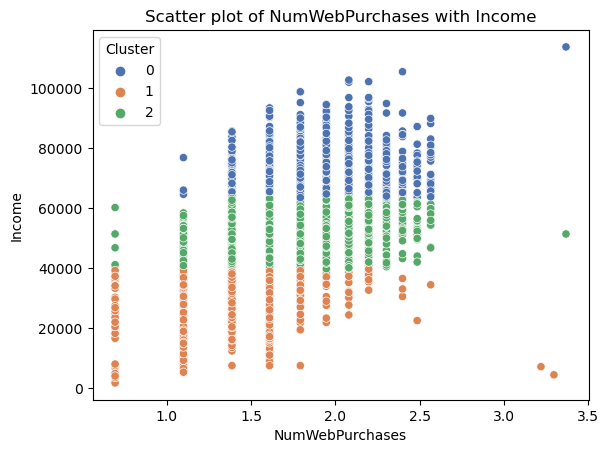

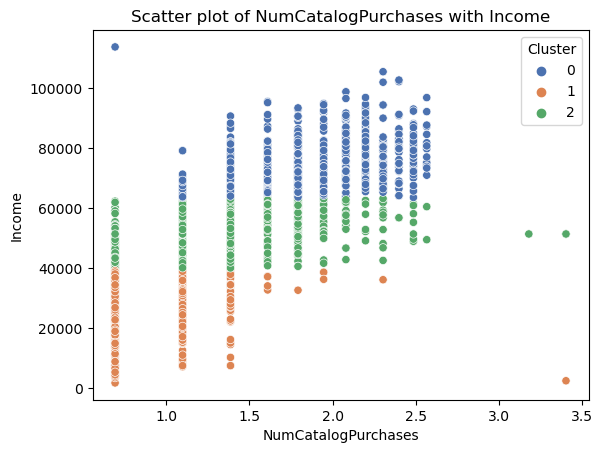

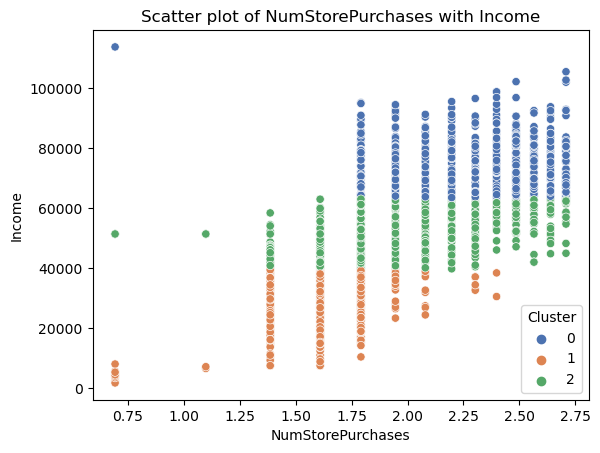

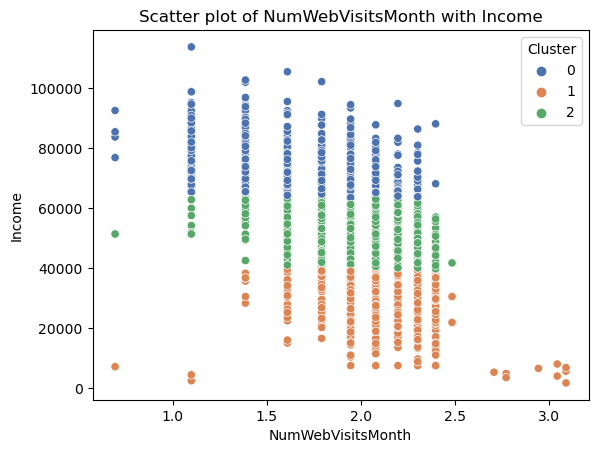

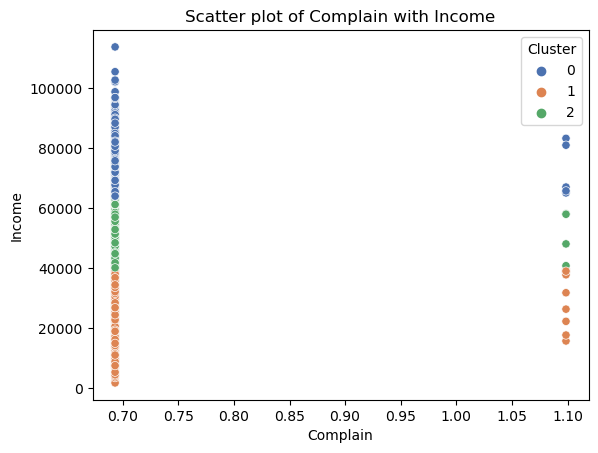

In [115]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Enrolled', 'Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    sns.scatterplot( data = data, x =x, y='Income', hue = 'Cluster',palette='deep')
    plt.title('Scatter plot of {} with Income'.format(x))
    plt.show()             

In [116]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'Children', 'Enrolled',
       'Cluster'],
      dtype='object')

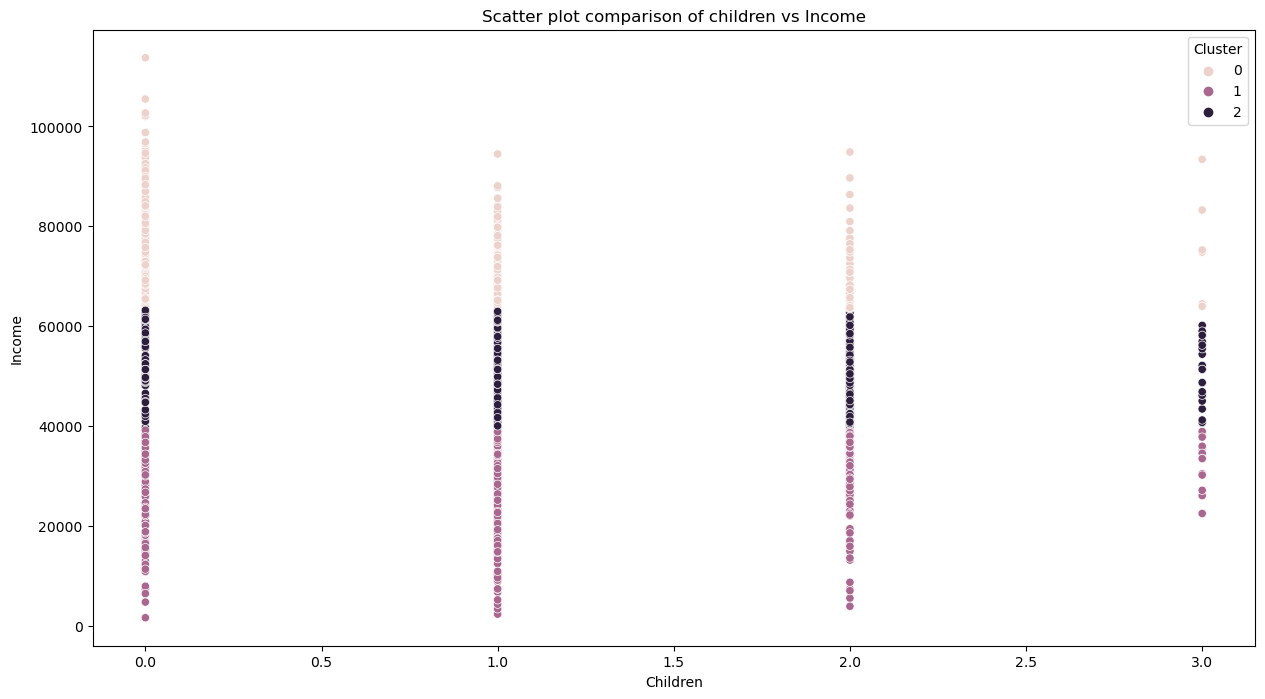

In [117]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='Children',y='Income',hue='Cluster')
plt.title('Scatter plot comparison of children vs Income')
plt.show()

In [118]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
data['Ag_Cluster'] = ag.fit_predict(data)

In [119]:
data.head(10)

Education  Marital_Status   Income   Recency  MntWines  MntFruits  \
0          0               1  58138.0  4.094345  6.456770   4.499810   
1          0               1  46344.0  3.688879  2.564949   1.098612   
2          0               0  71613.0  3.332205  6.059123   3.931826   
3          0               0  26646.0  3.332205  2.564949   1.791759   
4          2               0  58293.0  4.564348  5.164786   3.806662   
5          1               0  62513.0  2.890372  6.257668   3.784190   
6          0               1  55635.0  3.583519  5.468060   4.204693   
7          2               0  33454.0  3.526361  4.356709   2.484907   
8          2               0  30351.0  3.044522  2.772589   0.693147   
9          2               0   5648.0  4.248495  3.401197   0.693147   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         6.306275         5.159055          4.499810      4.499810   
1         2.079442         1.386294          1.098612      2.079442   
2         4.859812         4.727388          3.135494      3.784190   
3         3.091042         2.484907          1.609438      1.945910   
4         4.787492         3.871201          3.367296      2.833213   
5         4.605170         0.693147          3.784190      2.772589   
6         5.111988         3.951244          3.931826      3.367296   
7         4.060443         1.609438          1.098612      3.218876   
8         3.258097         1.609438          1.609438      1.386294   
9         2.079442         1.098612          1.098612      2.708050   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           1.609438         2.302585             2.484907           1.791759   
1           1.386294         1.098612             1.098612           1.386294   
2           1.098612         2.302585             1.386294           2.484907   
3           1.386294         1.386294             0.693147           1.791759   
4           1.945910         1.945910             1.609438           2.079442   
5           1.386294         2.079442             1.791759           2.484907   
6           1.791759         2.197225             1.609438           2.197225   
7           1.386294         1.791759             0.693147           1.791759   
8           1.098612         1.609438             0.693147           1.386294   
9           1.098612         1.098612             0.693147           0.693147   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0           2.197225             0             0             0             0   
1           1.945910             0             0             0             0   
2           1.791759             0             0             0             0   
3           2.079442             0             0             0             0   
4           1.945910             0             0             0             0   
5           2.079442             0             0             0             0   
6           2.079442             0             0             0             0   
7           2.302585             0             0             0             0   
8           2.397895             0             0             0             0   
9           3.091042             1             0             0             0   

   AcceptedCmp2  Complain  Response  age  Children  Enrolled  Cluster  \
0             0  0.693147         1   61         0  7.574045        2   
1             0  0.693147         0   64         2  7.242082        2   
2             0  0.693147         0   53         0  7.375256        0   
3             0  0.693147         0   34         1  7.260523        1   
4             0  0.693147         0   37         1  7.275865        2   
5             0  0.693147         0   51         1  7.363280        2   
6             0  0.693147         0   47         1  7.537430        2   
7             0  0.693147         0   33         1  7.438972        1  

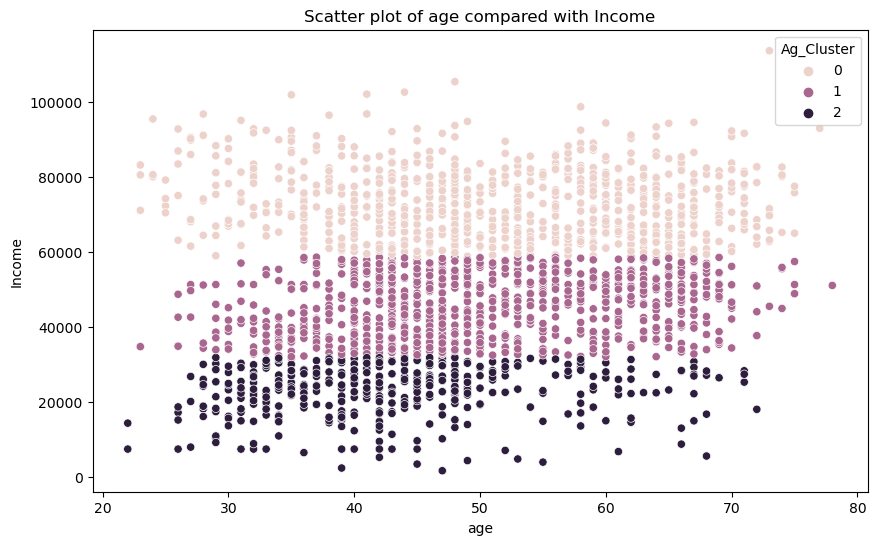

In [120]:
plt.figure(figsize= (10,6))
sns.scatterplot( data = data, x ='age', y='Income', hue = 'Ag_Cluster')
plt.title('Scatter plot of age compared with Income')
plt.show()

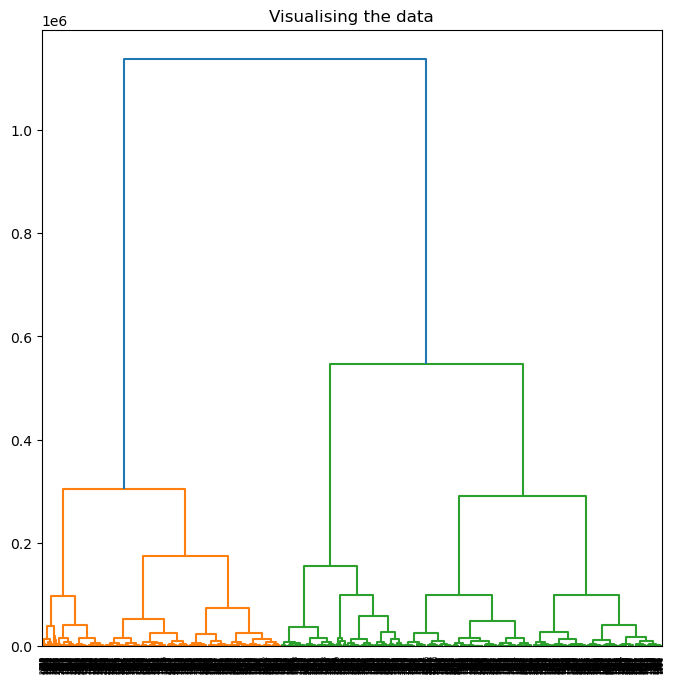

In [121]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

In [122]:
data

Education  Marital_Status   Income   Recency  MntWines  MntFruits  \
0             0               1  58138.0  4.094345  6.456770   4.499810   
1             0               1  46344.0  3.688879  2.564949   1.098612   
2             0               0  71613.0  3.332205  6.059123   3.931826   
3             0               0  26646.0  3.332205  2.564949   1.791759   
4             2               0  58293.0  4.564348  5.164786   3.806662   
...         ...             ...      ...       ...       ...        ...   
2235          0               0  61223.0  3.871201  6.566672   3.806662   
2236          2               0  64014.0  4.060443  6.011267   0.693147   
2237          0               1  56981.0  4.532599  6.813445   3.912023   
2238          1               0  69245.0  2.302585  6.063785   3.465736   
2239          2               0  52869.0  3.737670  4.454347   1.609438   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            6.306275         5.159055          4.499810      4.499810   
1            2.079442         1.386294          1.098612      2.079442   
2            4.859812         4.727388          3.135494      3.784190   
3            3.091042         2.484907          1.609438      1.945910   
4            4.787492         3.871201          3.367296      2.833213   
...               ...              ...               ...           ...   
2235         5.214936         3.784190          4.787492      3.258097   
2236         3.465736         0.693147          0.693147      2.302585   
2237         5.389072         3.526361          2.639057      3.258097   
2238         5.375278         4.406719          3.465736      4.143135   
2239         4.143135         1.386294          1.098612      3.135494   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              1.609438         2.302585             2.484907   
1              1.386294         1.098612             1.098612   
2              1.098612         2.302585             1.386294   
3              1.386294         1.386294             0.693147   
4              1.945910         1.945910             1.609438   
...                 ...              ...                  ...   
2235           1.386294         2.397895             1.609438   
2236           2.197225         2.302585             1.386294   
2237           1.098612         1.386294             1.609438   
2238           1.386294         2.079442             1.945910   
2239           1.609438         1.609438             1.098612   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0              1.791759           2.197225             0             0   
1              1.386294           1.945910             0             0   
2              2.484907           1.791759             0             0   
3              1.791759           2.079442             0             0   
4              2.079442           1.945910             0             0   
...                 ...                ...           ...           ...   
2235           1.791759           1.945910             0             0   
2236           1.945910           2.197225             0             0   
2237           2.708050           2.079442             0             1   
2238           2.484907           1.609438             0             0   
2239           1.791759           2.197225             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  age  \
0                0             0             0  0.693147         1   61   
1                0             0             0  0.693147         0   64   
2                0             0             0  0.693147         0   53   
3                0             0             0  0.693147         0   34   
4                0             0             0  0.693147         0   37   
...            ...           ...           ...       ...       ...  ...   
2235             0   

In [123]:
data1 = data.copy()

In [124]:
data1.drop(['Ag_Cluster'],axis=1,inplace=True)

In [125]:
data1.head()

Education  Marital_Status   Income   Recency  MntWines  MntFruits  \
0          0               1  58138.0  4.094345  6.456770   4.499810   
1          0               1  46344.0  3.688879  2.564949   1.098612   
2          0               0  71613.0  3.332205  6.059123   3.931826   
3          0               0  26646.0  3.332205  2.564949   1.791759   
4          2               0  58293.0  4.564348  5.164786   3.806662   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         6.306275         5.159055          4.499810      4.499810   
1         2.079442         1.386294          1.098612      2.079442   
2         4.859812         4.727388          3.135494      3.784190   
3         3.091042         2.484907          1.609438      1.945910   
4         4.787492         3.871201          3.367296      2.833213   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           1.609438         2.302585             2.484907           1.791759   
1           1.386294         1.098612             1.098612           1.386294   
2           1.098612         2.302585             1.386294           2.484907   
3           1.386294         1.386294             0.693147           1.791759   
4           1.945910         1.945910             1.609438           2.079442   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0           2.197225             0             0             0             0   
1           1.945910             0             0             0             0   
2           1.791759             0             0             0             0   
3           2.079442             0             0             0             0   
4           1.945910             0             0             0             0   

   AcceptedCmp2  Complain  Response  age  Children  Enrolled  Cluster  
0             0  0.693147         1   61         0  7.574045        2  
1             0  0.693147         0   64         2  7.242082        2  
2             0  0.693147         0   53         0  7.375256        0  
3             0  0.693147         0   34         1  7.260523        1  
4             0  0.693147         0   37         1  7.275865        2

In [142]:
data1.describe()

Education  Marital_Status         Income      Recency     MntWines  \
count  2237.000000     2237.000000    2237.000000  2237.000000  2237.000000   
mean      0.599017        0.354940   51618.653107     3.664779     4.702439   
std       0.821044        0.478602   20564.334439     0.877594     1.724275   
min       0.000000        0.000000    1730.000000     0.693147     0.693147   
25%       0.000000        0.000000   35523.000000     3.258097     3.258097   
50%       0.000000        0.000000   51381.500000     3.931826     5.167639   
75%       1.000000        1.000000   68092.000000     4.330733     6.202536   
max       2.000000        1.000000  113734.000000     4.615121     7.180070   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2237.000000      2237.000000      2237.000000       2237.000000   
mean      2.377727         4.127299         2.653568          2.384126   
std       1.274452         1.466803         1.381735          1.296727   
min       0.693147         0.693147         0.693147          0.693147   
25%       1.098612         2.890372         1.609438          1.098612   
50%       2.302585         4.234107         2.639057          2.302585   
75%       3.401197         5.379897         3.784190          3.433987   
max       4.983607         6.739337         5.313206          5.023881   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2237.000000        2237.000000      2237.000000          2237.000000   
mean       3.169103           1.374218         1.707987             1.374206   
std        1.136410           0.330656         0.445331             0.562132   
min        0.693147           0.693147         0.693147             0.693147   
25%        2.397895           1.098612         1.386294             0.693147   
50%        3.258097           1.386294         1.791759             1.386294   
75%        4.007333           1.609438         2.079442             1.791759   
max        5.308268           2.302585         3.367296             3.401197   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2237.000000        2237.000000   2237.000000   2237.000000   
mean            1.968892           1.926370      0.072865      0.074654   
std             0.411459           0.377516      0.259974      0.262890   
min             0.693147           0.693147      0.000000      0.000000   
25%             1.609438           1.609438      0.000000      0.000000   
50%             1.945910           2.079442      0.000000      0.000000   
75%             2.302585           2.197225      0.000000      0.000000   
max             2.708050           3.091042      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2237.000000   2237.000000   2237.000000  2237.000000  2237.000000   
mean       0.072418      0.064372      0.013411     0.696772     0.149307   
std        0.259237      0.245469      0.115052     0.038175     0.356471   
min        0.000000      0.000000      0.000000     0.693147     0.000000   
25%        0.000000      0.000000      0.000000     0.693147     0.000000   
50%        0.000000      0.000000      0.000000     0.693147     0.000000   
75%        0.000000      0.000000      0.000000     0.693147     0.000000   
max        1.000000      1.000000      1.000000     1.098612     1.000000   

               age     Children     Enrolled      Cluster  
count  2237.000000  2237.000000  2237.000000  2237.000000  
mean     49.098346     0.950827     7.393372     1.038891  
std      11.701917     0.752037     0.124902     0.823301  
min      22.000000     0.000000     7.157735     0.000000  
25%      41.000000     0.000000     7.289611     0.000000  
50%      48.000000     1.000000     7.402452     1.000000  
75%      59.000000     1.000000     7.502738     2.000000  
max      78.000000     3.000000     7.592366     2.000000

In [126]:
x = data1.iloc[:,0:25]
y = data1.iloc[:,25]

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [128]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1677, 25)
(560, 25)
(1677,)
(560,)


In [129]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [20,30,40,50,60,70,80,90, 100, 200],
              'max_depth': [4,6,8,9,10,15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2'],
              'criterion': ['gini', 'entropy','log_loss'] }


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}


In [130]:
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=20,
                       random_state=42)

In [131]:
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve

In [132]:
y_hat_train = best_model.predict(x_train)

In [133]:
confusion_matrix(y_train, y_hat_train)

array([[518,   0,   0],
       [  0, 547,   0],
       [  0,   0, 612]], dtype=int64)

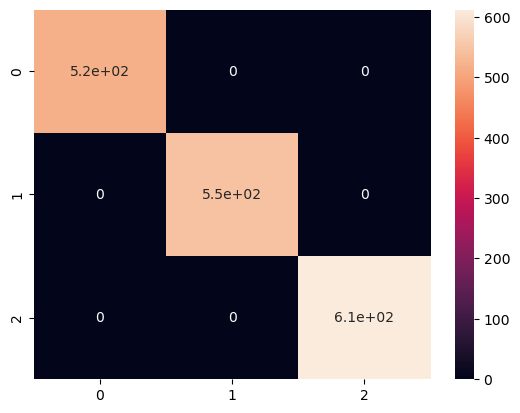

In [134]:
cm = confusion_matrix(y_train, y_hat_train)
sns.heatmap(cm, annot=True)
plt.show()

In [136]:
y_hat_test = best_model.predict(x_test)

In [137]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       198
           1       1.00      0.99      0.99       171
           2       0.98      1.00      0.99       191

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



In [138]:
confusion_matrix(y_test, y_hat_test)

array([[197,   0,   1],
       [  0, 169,   2],
       [  0,   0, 191]], dtype=int64)

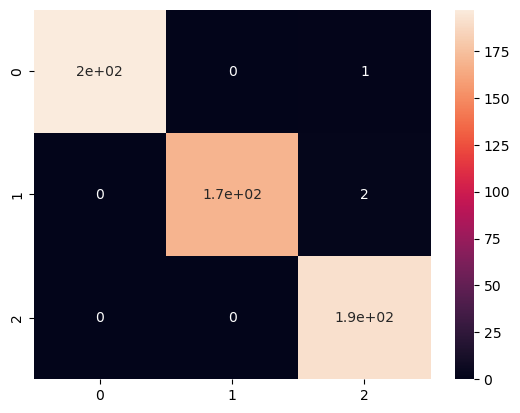

In [139]:
cm = confusion_matrix(y_test, y_hat_test)
sns.heatmap(cm, annot=True)
plt.show()

In [140]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       198
           1       1.00      0.99      0.99       171
           2       0.98      1.00      0.99       191

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

